In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#데이터 불러오기

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/sideproject/total_data.csv')

data.head()

,id,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,...,batter_run_value,whiffs,whiff_per_swing,batted_ball_events,batted_ball_event_per_swing,H,HR,AVG,SLG,OPS
0,665833,"Cruz, Oneil",451,0.911111,313,78.114430,0.742794,0.322684,0.223947,0.233227,...,-10.369543,138,0.305987,154,0.341463,78,14,0.246,0.438,0.737
1,656941,"Schwarber, Kyle",493,0.901280,351,77.307412,0.762677,0.344729,0.245436,0.230769,...,-1.775891,142,0.288032,182,0.369168,80,19,0.249,0.455,0.831
2,592450,"Judge, Aaron",580,0.906250,403,76.831219,0.724138,0.367246,0.255172,0.277916,...,30.983117,177,0.305172,201,0.346552,105,34,0.306,0.679,1.112
3,656305,"Chapman, Matt",592,0.905199,452,76.531886,0.652027,0.254425,0.194257,0.163717,...,-11.612477,140,0.236486,201,0.339527,84,13,0.235,0.411,0.730
4,666624,"Morel, Christopher",580,0.906250,401,76.236171,0.677586,0.306733,0.212069,0.189526,...,-16.907195,179,0.308621,213,0.367241,69,18,0.202,0.387,0.690


In [ ]:
data.shape

(142, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           142 non-null    int64  
 1   name                         142 non-null    object 
 2   swings_competitive           142 non-null    int64  
 3   percent_swings_competitive   142 non-null    float64
 4   contact                      142 non-null    int64  
 5   avg_bat_speed                142 non-null    float64
 6   hard_swing_rate              142 non-null    float64
 7   squared_up_per_bat_contact   142 non-null    float64
 8   squared_up_per_swing         142 non-null    float64
 9   blast_per_bat_contact        142 non-null    float64
 10  blast_per_swing              142 non-null    float64
 11  swing_length                 142 non-null    float64
 12  swords                       142 non-null    int64  
 13  batter_run_value    

In [ ]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/sideproject/total_data.csv')

# 출력할 열들만 선택
columns_to_display = ['id', 'name', 'avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length', 'H', 'HR', 'AVG', 'SLG', 'OPS']
filtered_data = data[columns_to_display]

# 선택한 열들을 출력
filtered_data.head()

,id,name,avg_bat_speed,squared_up_per_swing,blast_per_swing,swing_length,H,HR,AVG,SLG,OPS
0,665833,"Cruz, Oneil",78.114430,0.223947,0.161863,7.646152,78,14,0.246,0.438,0.737
1,656941,"Schwarber, Kyle",77.307412,0.245436,0.164300,7.818701,80,19,0.249,0.455,0.831
2,592450,"Judge, Aaron",76.831219,0.255172,0.193103,8.191971,105,34,0.306,0.679,1.112
3,656305,"Chapman, Matt",76.531886,0.194257,0.125000,7.409336,84,13,0.235,0.411,0.730
4,666624,"Morel, Christopher",76.236171,0.212069,0.131034,8.003286,69,18,0.202,0.387,0.690


In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    142 non-null    int64  
 1   name                  142 non-null    object 
 2   avg_bat_speed         142 non-null    float64
 3   squared_up_per_swing  142 non-null    float64
 4   blast_per_swing       142 non-null    float64
 5   swing_length          142 non-null    float64
 6   H                     142 non-null    int64  
 7   HR                    142 non-null    int64  
 8   AVG                   142 non-null    float64
 9   SLG                   142 non-null    float64
 10  OPS                   142 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 12.3+ KB


#4개 배트 트래킹 데이터 간 상관성 알아보기

##vs avg.bat speed

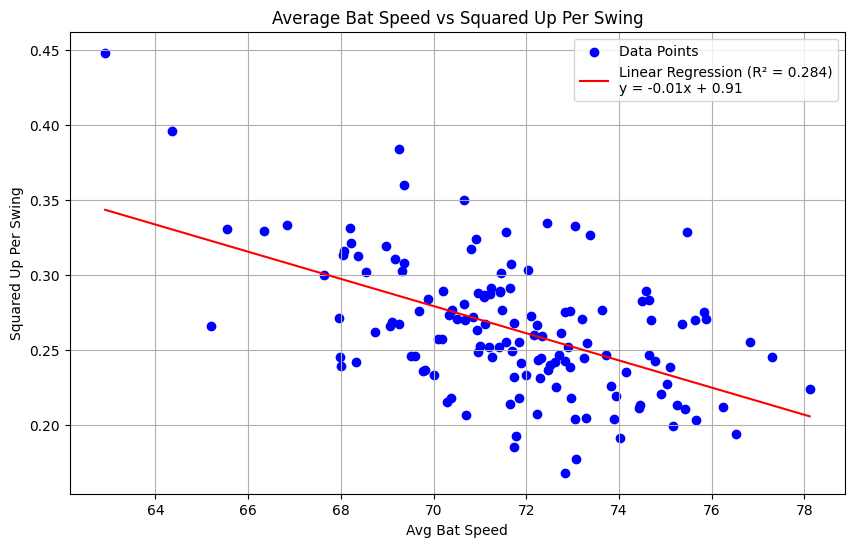

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# X와 y 변수 정의
X = data['avg_bat_speed'].values.reshape(-1, 1)
y = data['squared_up_per_swing'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Avg Bat Speed')
plt.ylabel('Squared Up Per Swing')
plt.title('Average Bat Speed vs Squared Up Per Swing')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

r = np.corrcoef(data.avg_bat_speed, data.squared_up_per_swing)
print(r)

[[ 1.         -0.53285619]
 [-0.53285619  1.        ]]


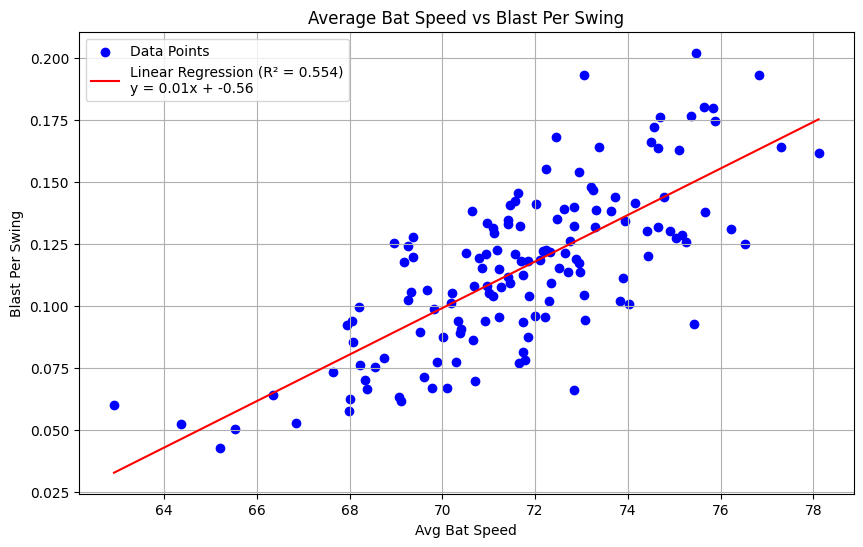

In [ ]:
# X와 y 변수 정의
X = data['avg_bat_speed'].values.reshape(-1, 1)
y = data['blast_per_swing'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Avg Bat Speed')
plt.ylabel('Blast Per Swing')
plt.title('Average Bat Speed vs Blast Per Swing')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.avg_bat_speed, data.blast_per_swing)
print(r)

[[1.         0.74442339]
 [0.74442339 1.        ]]


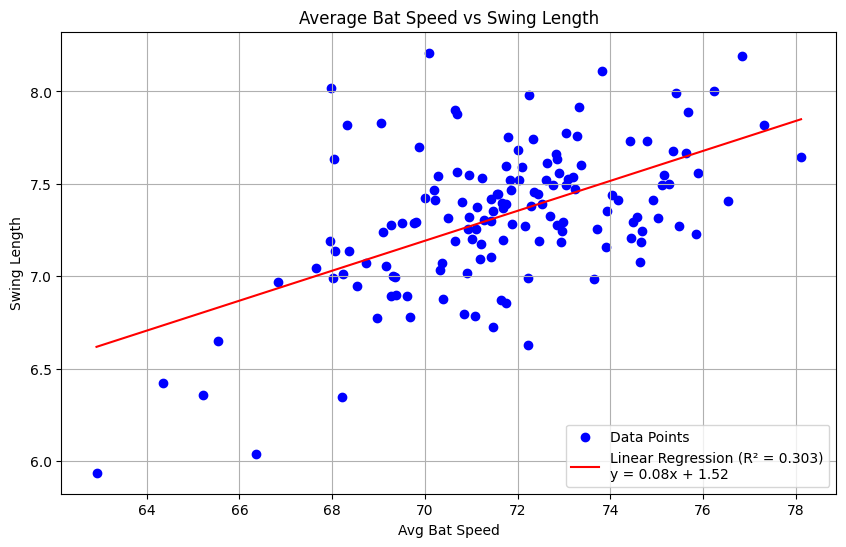

In [ ]:
X = data['avg_bat_speed'].values.reshape(-1, 1)
y = data['swing_length'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')
plt.xlabel('Avg Bat Speed')
plt.ylabel('Swing Length')
plt.title('Average Bat Speed vs Swing Length')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.avg_bat_speed, data.swing_length)
print(r)

[[1.         0.55023476]
 [0.55023476 1.        ]]


##vs squared-up rate

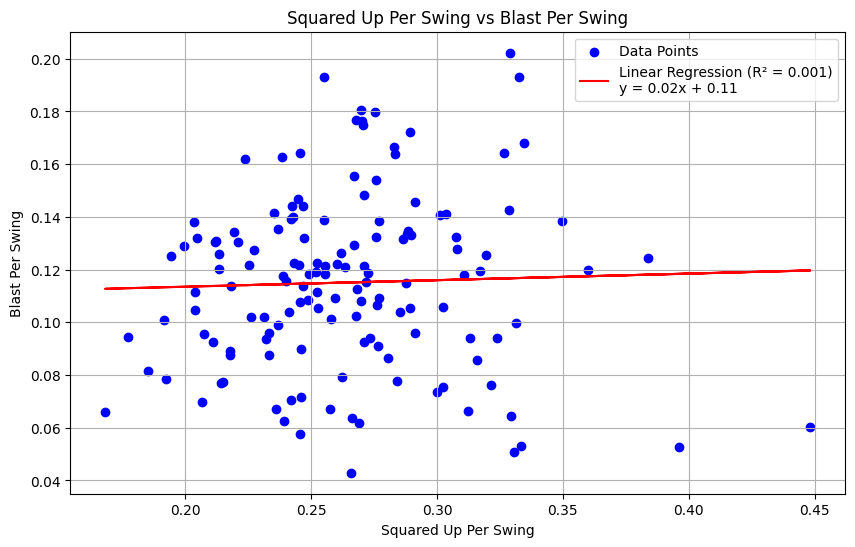

In [ ]:
# X와 y 변수 정의
X = data['squared_up_per_swing'].values.reshape(-1, 1)
y = data['blast_per_swing'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Squared Up Per Swing')
plt.ylabel('Blast Per Swing')
plt.title('Squared Up Per Swing vs Blast Per Swing')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.squared_up_per_swing, data.blast_per_swing)
print(r)

[[1.         0.03349767]
 [0.03349767 1.        ]]


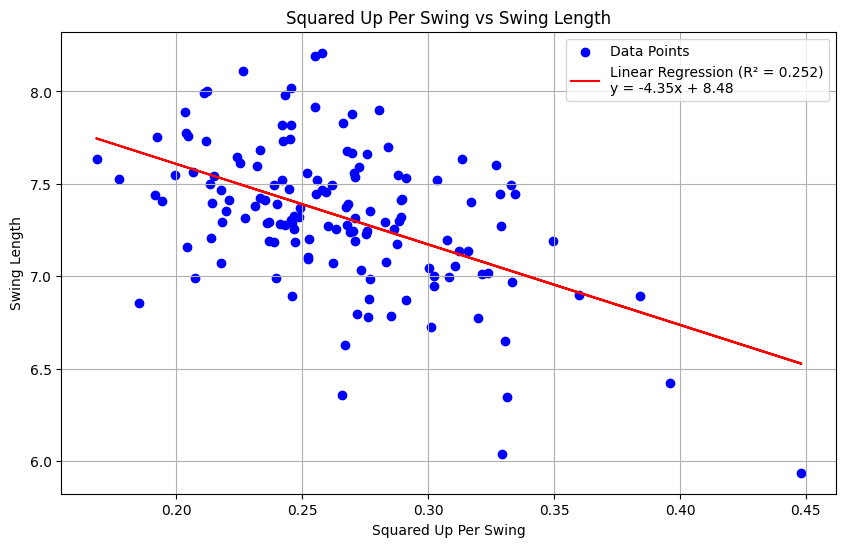

In [ ]:
# X와 y 변수 정의
X = data['squared_up_per_swing'].values.reshape(-1, 1)
y = data['swing_length'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Squared Up Per Swing')
plt.ylabel('Swing Length')
plt.title('Squared Up Per Swing vs Swing Length')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.squared_up_per_swing, data.swing_length)
print(r)

[[ 1.         -0.50221241]
 [-0.50221241  1.        ]]


##vs blast

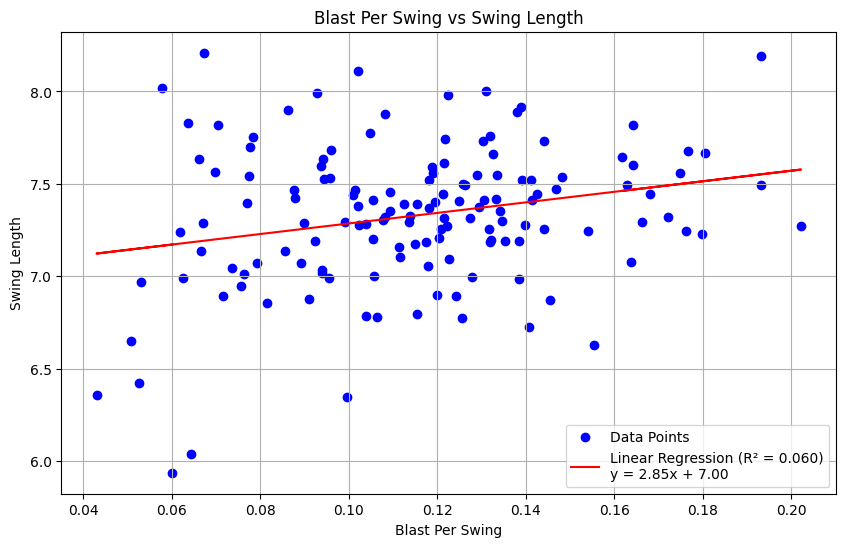

In [ ]:
# X와 y 변수 정의
X = data['blast_per_swing'].values.reshape(-1, 1)
y = data['swing_length'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Blast Per Swing')
plt.ylabel('Swing Length')
plt.title('Blast Per Swing vs Swing Length')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.blast_per_swing, data.swing_length)
print(r)

[[1.         0.24407042]
 [0.24407042 1.        ]]


##전체적으로 훑어보기

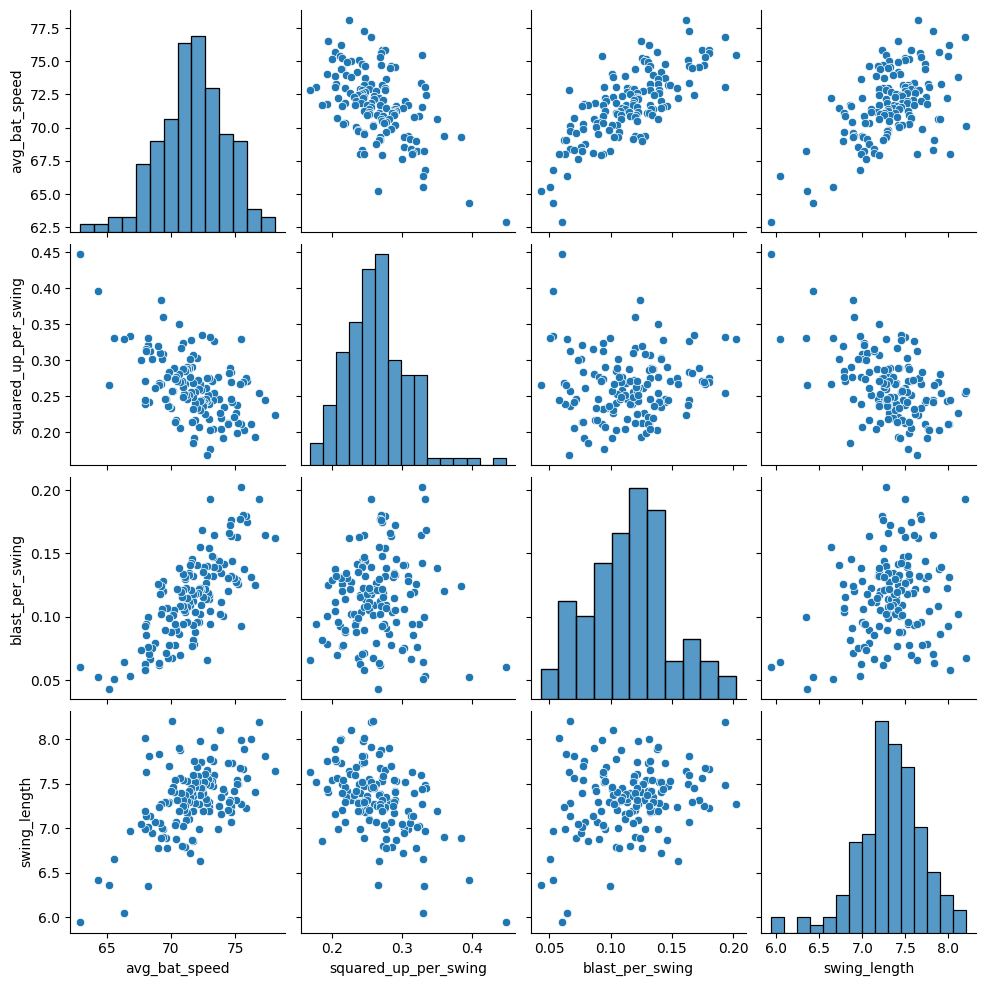

In [ ]:
import seaborn as sns

cols = ['avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length']
data2 = data[cols]

sns.pairplot(data2)
plt.show()

#배트 트래킹 데이터와 클래식 데이터 간의 상관관계 알아보기

##평균 배트 스피드와의 상관성

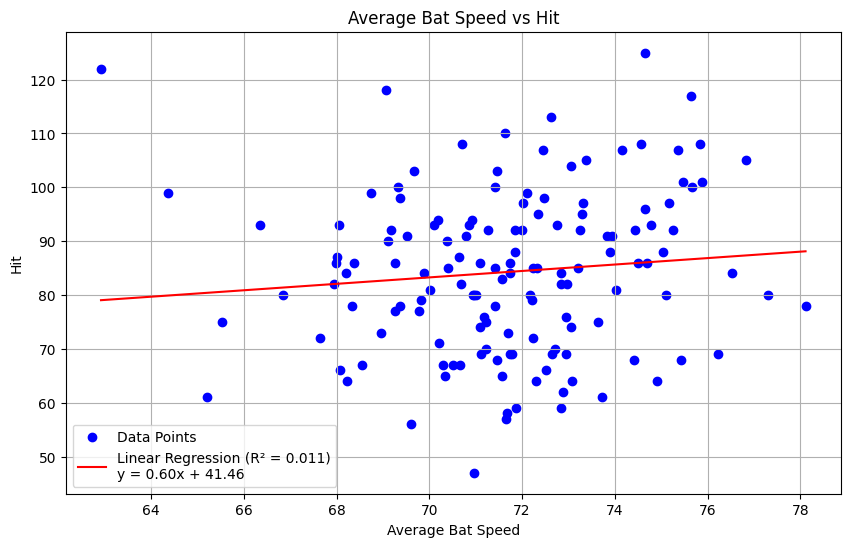

In [ ]:
# X와 y 변수 정의
X = data['avg_bat_speed'].values.reshape(-1, 1)
y = data['H'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Average Bat Speed')
plt.ylabel('Hit')
plt.title('Average Bat Speed vs Hit')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.avg_bat_speed, data.H)
print(r)

[[1.         0.10440058]
 [0.10440058 1.        ]]


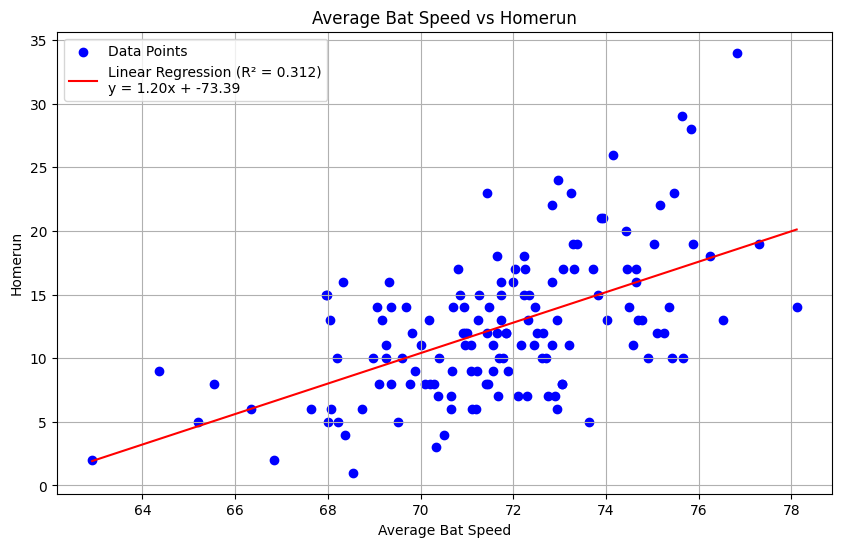

In [ ]:
# X와 y 변수 정의
X = data['avg_bat_speed'].values.reshape(-1, 1)
y = data['HR'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Average Bat Speed')
plt.ylabel('Homerun')
plt.title('Average Bat Speed vs Homerun')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.avg_bat_speed, data.HR)
print(r)

[[1.         0.55894919]
 [0.55894919 1.        ]]


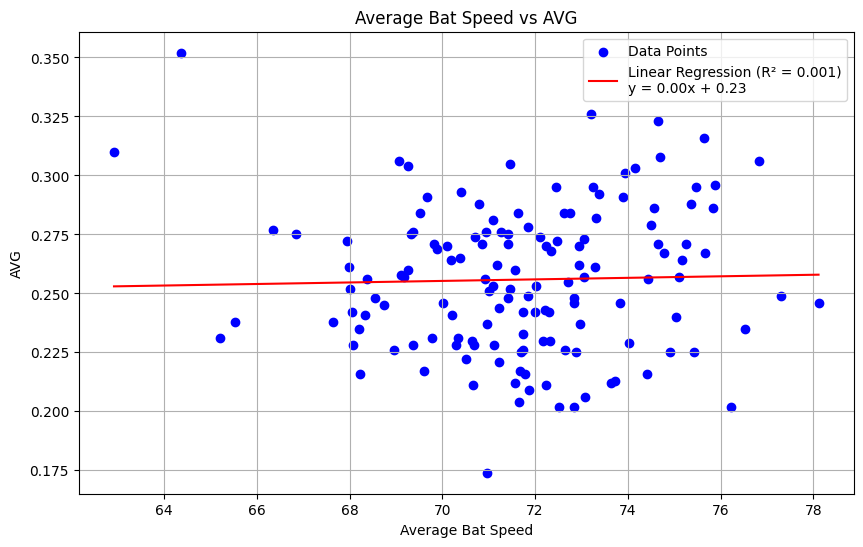

In [ ]:
# X와 y 변수 정의
X = data['avg_bat_speed'].values.reshape(-1, 1)
y = data['AVG'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Average Bat Speed')
plt.ylabel('AVG')
plt.title('Average Bat Speed vs AVG')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.avg_bat_speed, data.AVG)
print(r)

[[1.         0.02782944]
 [0.02782944 1.        ]]


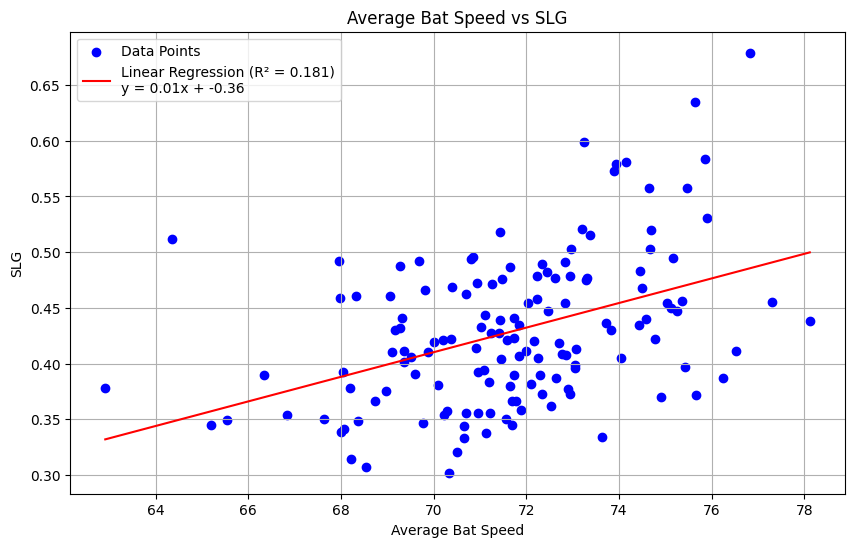

In [ ]:
# X와 y 변수 정의
X = data['avg_bat_speed'].values.reshape(-1, 1)
y = data['SLG'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Average Bat Speed')
plt.ylabel('SLG')
plt.title('Average Bat Speed vs SLG')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.avg_bat_speed, data.SLG)
print(r)

[[1.         0.42515752]
 [0.42515752 1.        ]]


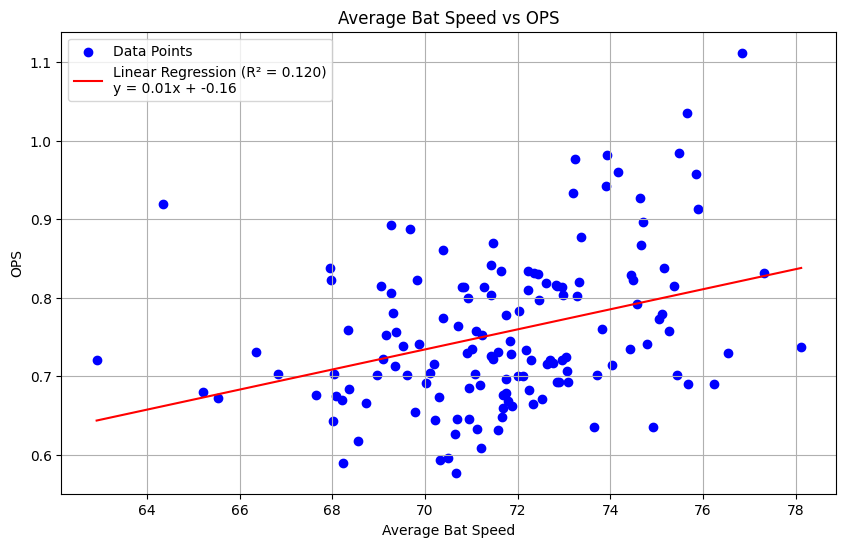

In [ ]:
# X와 y 변수 정의
X = data['avg_bat_speed'].values.reshape(-1, 1)
y = data['OPS'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Average Bat Speed')
plt.ylabel('OPS')
plt.title('Average Bat Speed vs OPS')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.avg_bat_speed, data.OPS)
print(r)

[[1.         0.34596266]
 [0.34596266 1.        ]]


##정타율과의 상관성

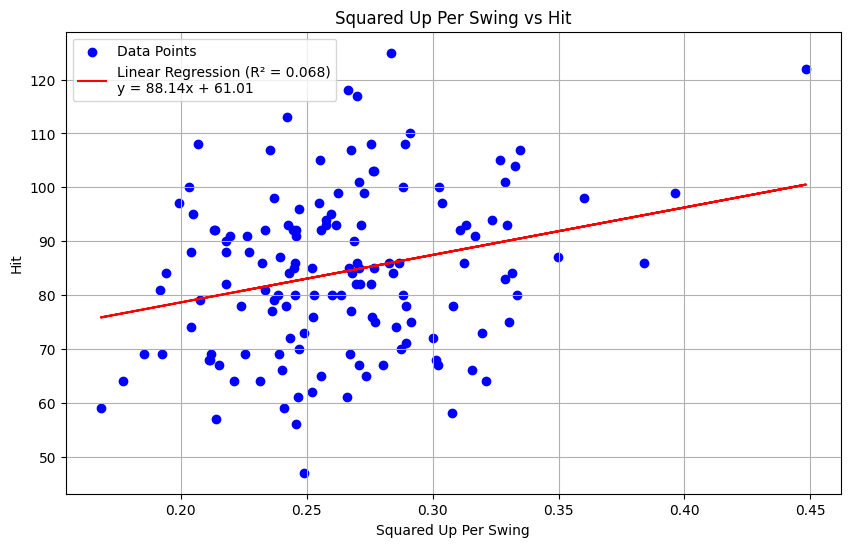

In [ ]:
# X와 y 변수 정의
X = data['squared_up_per_swing'].values.reshape(-1, 1)
y = data['H'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Squared Up Per Swing')
plt.ylabel('Hit')
plt.title('Squared Up Per Swing vs Hit')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.squared_up_per_swing, data.H)
print(r)

[[1.         0.26166083]
 [0.26166083 1.        ]]


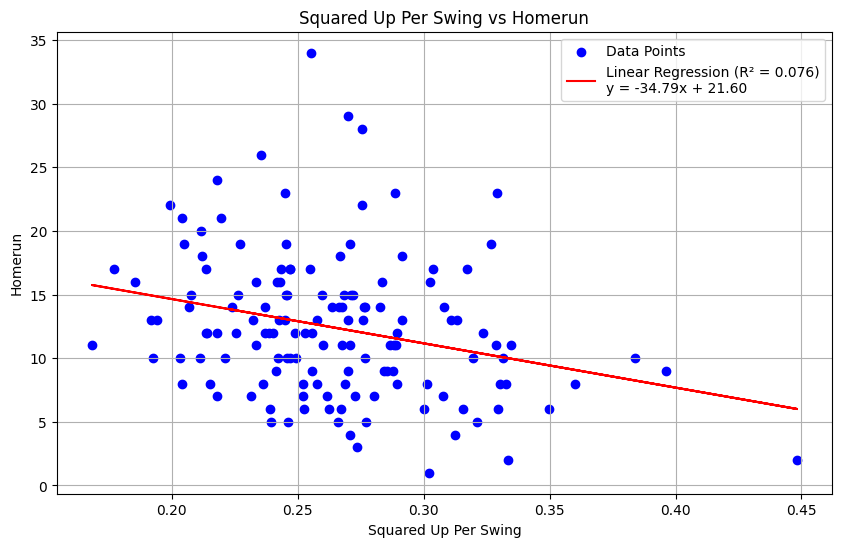

In [ ]:
# X와 y 변수 정의
X = data['squared_up_per_swing'].values.reshape(-1, 1)
y = data['HR'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Squared Up Per Swing')
plt.ylabel('Homerun')
plt.title('Squared Up Per Swing vs Homerun')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.squared_up_per_swing, data.HR)
print(r)

[[ 1.         -0.27596663]
 [-0.27596663  1.        ]]


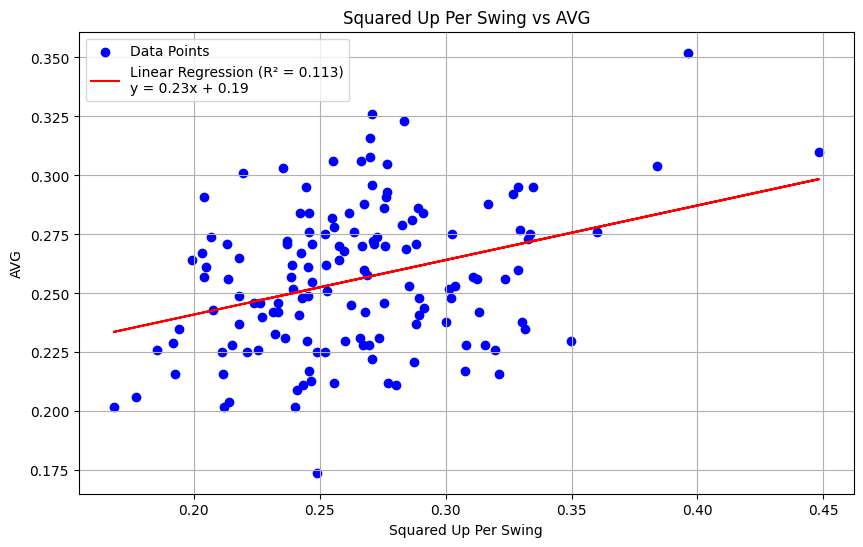

In [ ]:
# X와 y 변수 정의
X = data['squared_up_per_swing'].values.reshape(-1, 1)
y = data['AVG'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Squared Up Per Swing')
plt.ylabel('AVG')
plt.title('Squared Up Per Swing vs AVG')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.squared_up_per_swing, data.AVG)
print(r)

[[1.         0.33569796]
 [0.33569796 1.        ]]


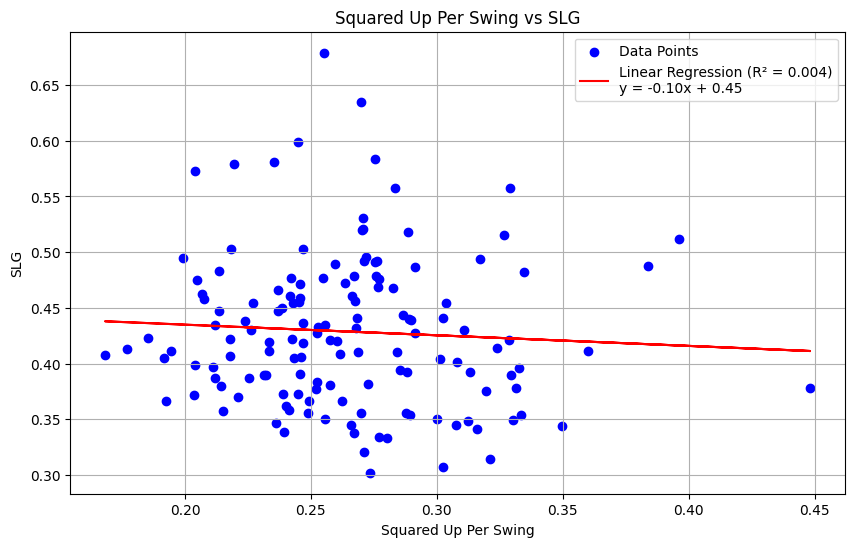

In [ ]:
# X와 y 변수 정의
X = data['squared_up_per_swing'].values.reshape(-1, 1)
y = data['SLG'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Squared Up Per Swing')
plt.ylabel('SLG')
plt.title('Squared Up Per Swing vs SLG')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.squared_up_per_swing, data.SLG)
print(r)

[[ 1.         -0.06232587]
 [-0.06232587  1.        ]]


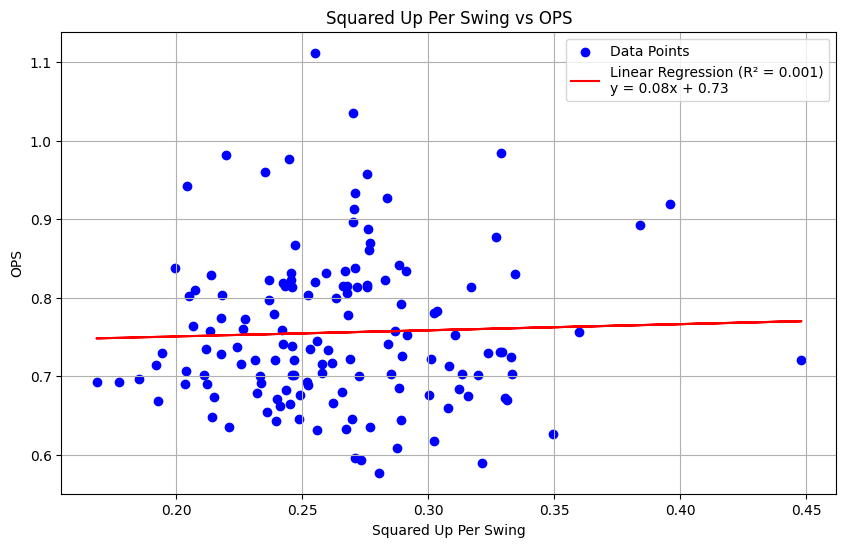

In [ ]:
# X와 y 변수 정의
X = data['squared_up_per_swing'].values.reshape(-1, 1)
y = data['OPS'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Squared Up Per Swing')
plt.ylabel('OPS')
plt.title('Squared Up Per Swing vs OPS')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.squared_up_per_swing, data.OPS)
print(r)

[[1.         0.03597975]
 [0.03597975 1.        ]]


##블래스트 타구 비율과의 상관성

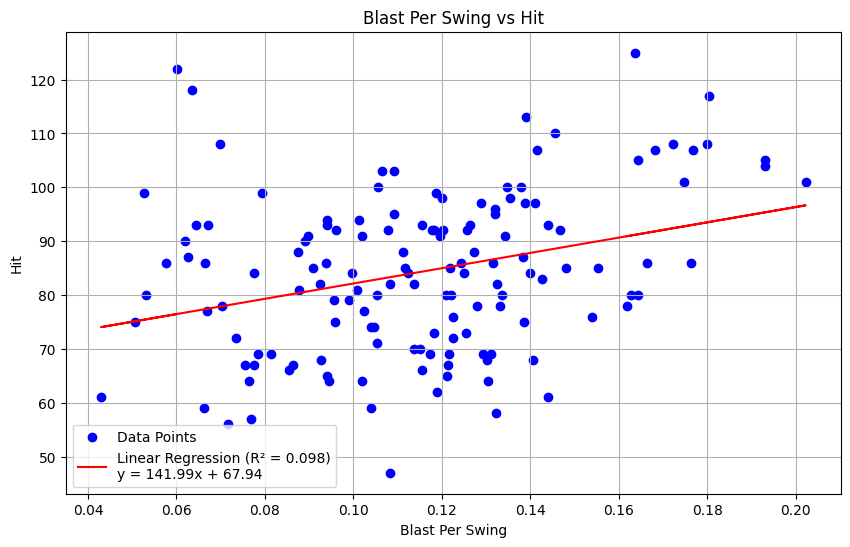

In [ ]:
# X와 y 변수 정의
X = data['blast_per_swing'].values.reshape(-1, 1)
y = data['H'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Blast Per Swing')
plt.ylabel('Hit')
plt.title('Blast Per Swing vs Hit')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.blast_per_swing, data.H)
print(r)

[[1.         0.31265824]
 [0.31265824 1.        ]]


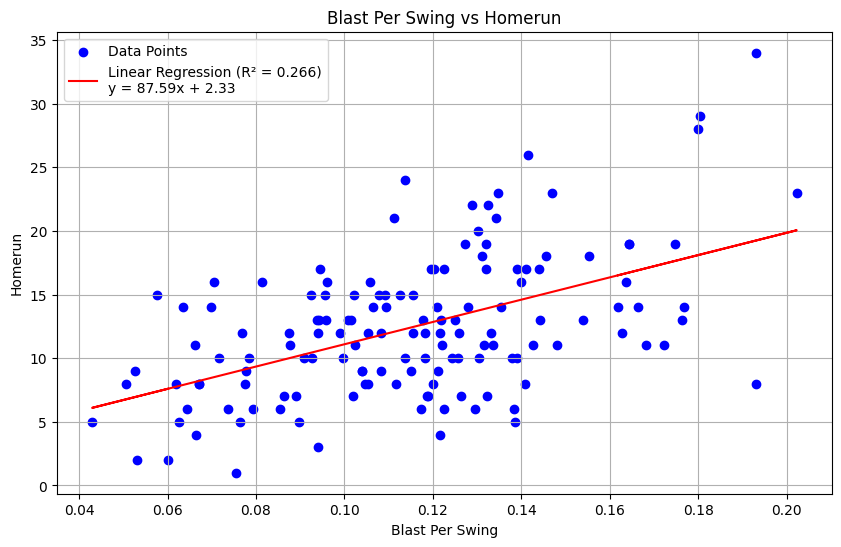

In [ ]:
# X와 y 변수 정의
X = data['blast_per_swing'].values.reshape(-1, 1)
y = data['HR'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Blast Per Swing')
plt.ylabel('Homerun')
plt.title('Blast Per Swing vs Homerun')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.blast_per_swing, data.HR)
print(r)

[[1.         0.51528262]
 [0.51528262 1.        ]]


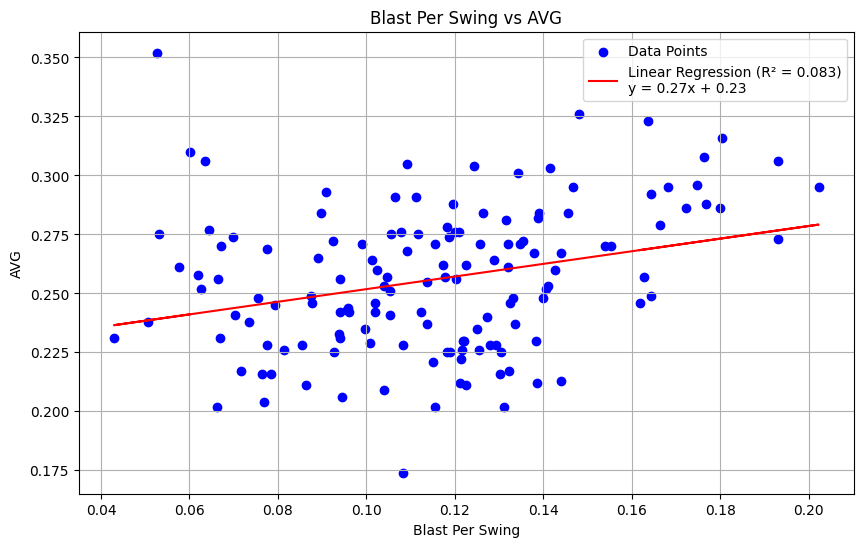

In [ ]:
# X와 y 변수 정의
X = data['blast_per_swing'].values.reshape(-1, 1)
y = data['AVG'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Blast Per Swing')
plt.ylabel('AVG')
plt.title('Blast Per Swing vs AVG')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.blast_per_swing, data.AVG)
print(r)

[[1.         0.28801332]
 [0.28801332 1.        ]]


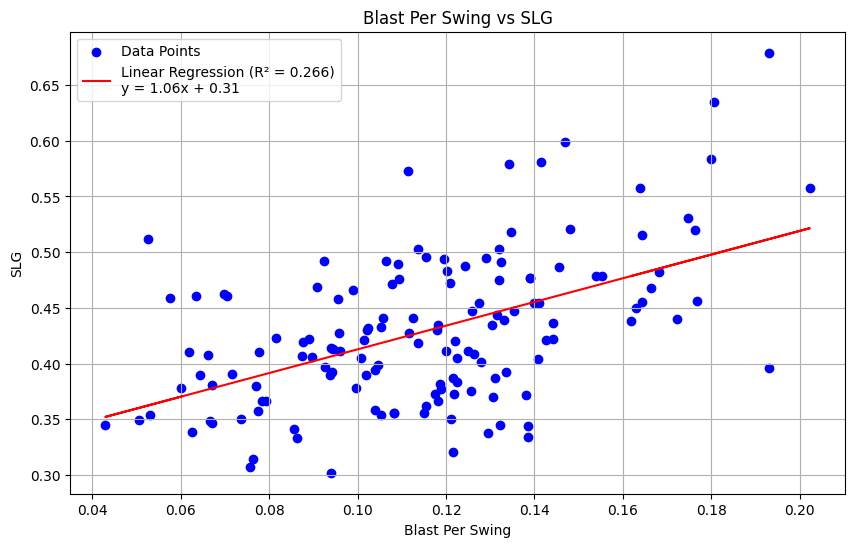

In [ ]:
# X와 y 변수 정의
X = data['blast_per_swing'].values.reshape(-1, 1)
y = data['SLG'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Blast Per Swing')
plt.ylabel('SLG')
plt.title('Blast Per Swing vs SLG')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.blast_per_swing, data.SLG)
print(r)

[[1.         0.51584925]
 [0.51584925 1.        ]]


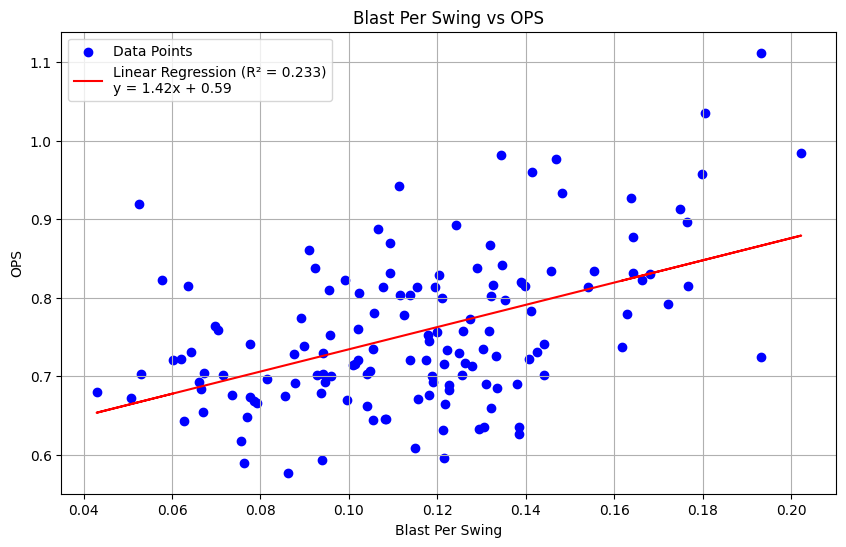

In [ ]:
# X와 y 변수 정의
X = data['blast_per_swing'].values.reshape(-1, 1)
y = data['OPS'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Blast Per Swing')
plt.ylabel('OPS')
plt.title('Blast Per Swing vs OPS')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.blast_per_swing, data.OPS)
print(r)

[[1.         0.48272598]
 [0.48272598 1.        ]]


## 스윙 길이와의 상관성

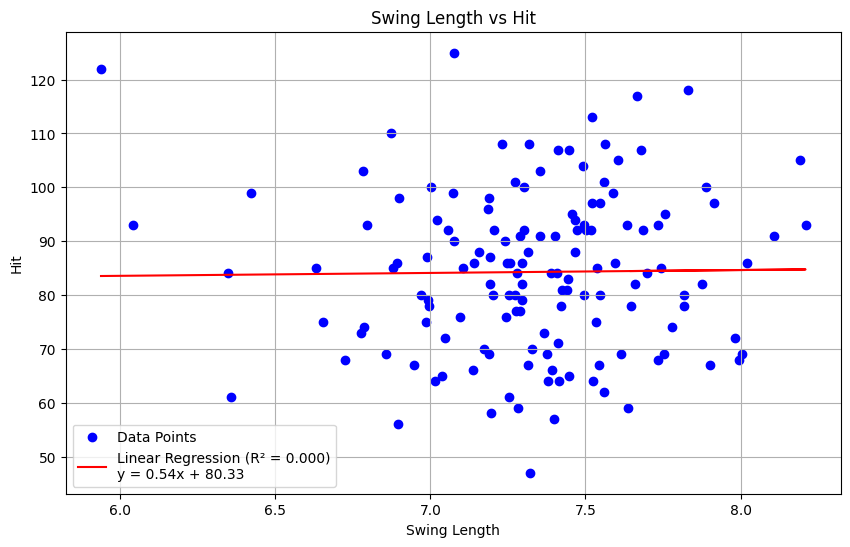

In [ ]:
# X와 y 변수 정의
X = data['swing_length'].values.reshape(-1, 1)
y = data['H'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Swing Length')
plt.ylabel('Hit')
plt.title('Swing Length vs Hit')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.swing_length, data.H)
print(r)

[[1.         0.01385693]
 [0.01385693 1.        ]]


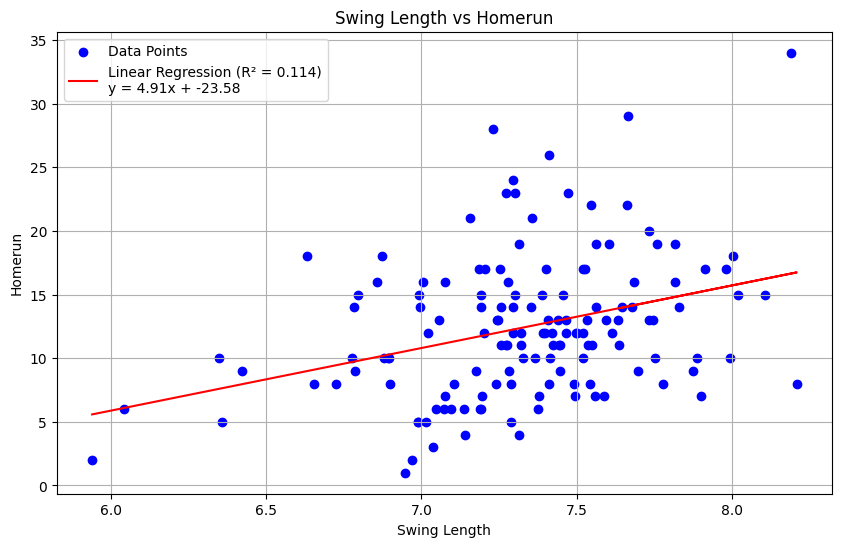

In [ ]:
# X와 y 변수 정의
X = data['swing_length'].values.reshape(-1, 1)
y = data['HR'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Swing Length')
plt.ylabel('Homerun')
plt.title('Swing Length vs Homerun')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.swing_length, data.HR)
print(r)

[[1.         0.33763242]
 [0.33763242 1.        ]]


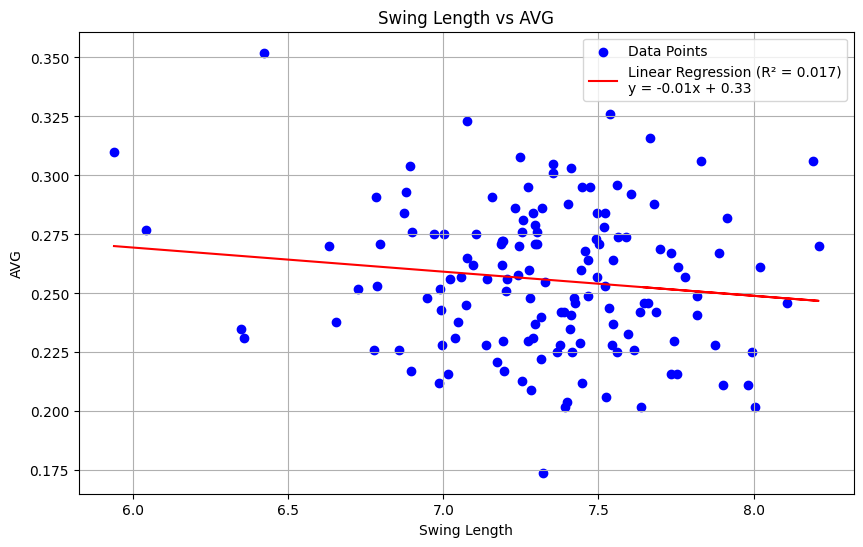

In [ ]:
# X와 y 변수 정의
X = data['swing_length'].values.reshape(-1, 1)
y = data['AVG'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Swing Length')
plt.ylabel('AVG')
plt.title('Swing Length vs AVG')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.swing_length, data.AVG)
print(r)

[[ 1.         -0.12855972]
 [-0.12855972  1.        ]]


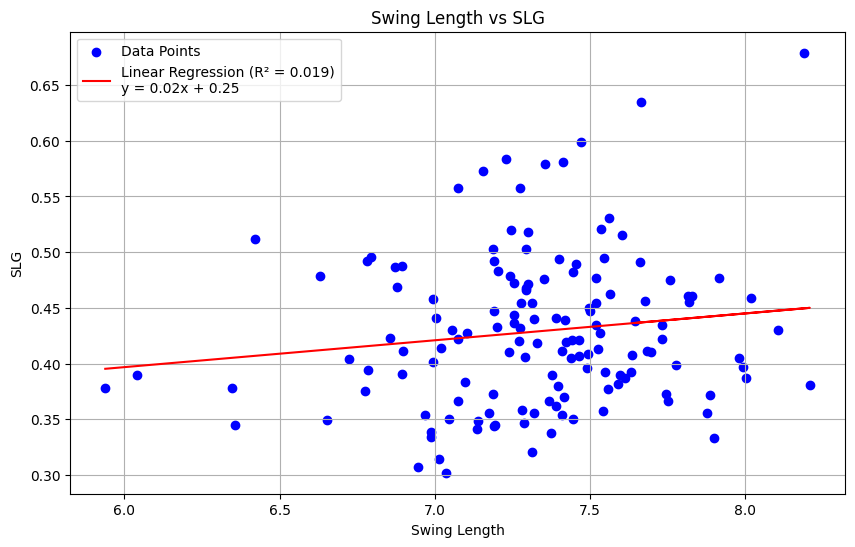

In [ ]:
# X와 y 변수 정의
X = data['swing_length'].values.reshape(-1, 1)
y = data['SLG'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Swing Length')
plt.ylabel('SLG')
plt.title('Swing Length vs SLG')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.swing_length, data.SLG)
print(r)

[[1.         0.13649667]
 [0.13649667 1.        ]]


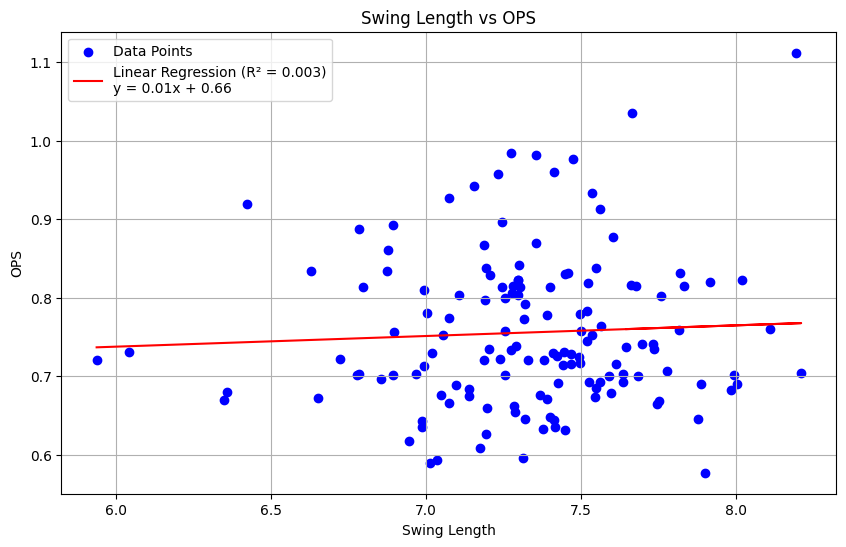

In [ ]:
# X와 y 변수 정의
X = data['swing_length'].values.reshape(-1, 1)
y = data['OPS'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# y 예측 값 계산
y_pred = model.predict(X)

# R^2 Score
r2 = r2_score(y, y_pred)

# 회귀선 방정식
slope = model.coef_[0][0]
intercept = model.intercept_[0]

equation = f'y = {slope:.2f}x + {intercept:.2f}'

# 그래프
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트 표시
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.3f})\n{equation}')  # 선형 회귀선과 방정식 표시
plt.xlabel('Swing Length')
plt.ylabel('OPS')
plt.title('Swing Length vs OPS')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r = np.corrcoef(data.swing_length, data.OPS)
print(r)

[[1.         0.05406118]
 [0.05406118 1.        ]]


#선형 회귀 모델

##안타 vs 배트 트래킹 데이터

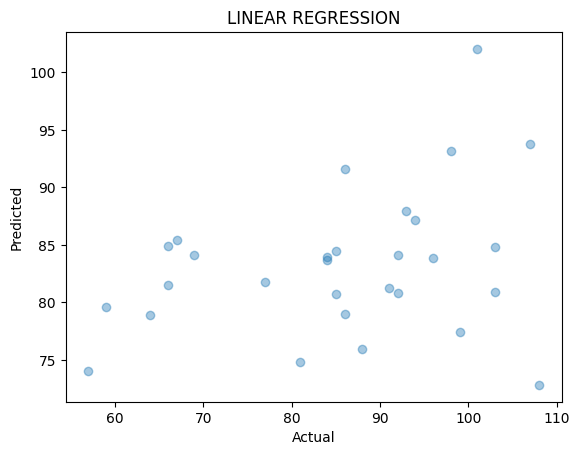

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['avg_bat_speed','squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y = data[['H']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LINEAR REGRESSION")
plt.show()

In [ ]:
reg.coef_

array([[  0.3769786 , 124.70963077, 103.246869  ,   5.13954126]])

In [ ]:
reg.score(X_train, y_train) #train set R^2 점수

0.18779637808154126

In [ ]:
reg.score(X_test, y_test) #test set R^2 점수

0.05735001532711603

##홈런 vs 배트 트래킹 데이터

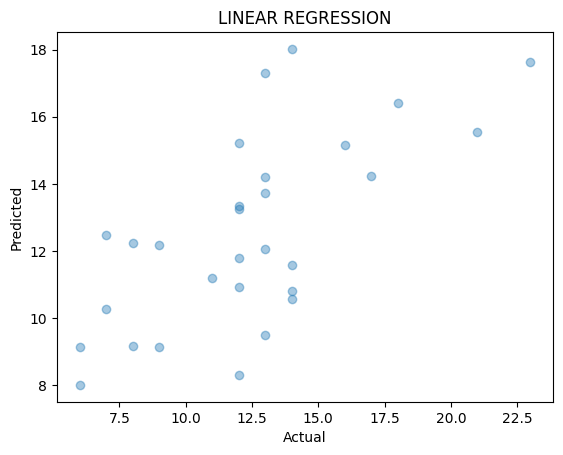

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['avg_bat_speed','squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y = data[['HR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LINEAR REGRESSION")
plt.show()

In [ ]:
reg.coef_

array([[-3.54744173e-03, -3.25473984e+01,  8.46865605e+01,
         1.37454448e+00]])

In [ ]:
reg.score(X_train, y_train) #train set R^2 점수

0.34653163646337015

In [ ]:
reg.score(X_test, y_test) #test set R^2 점수

0.4460988456922136

###강한 상관관계(계수0.5이상)인 feature로만 돌려봄

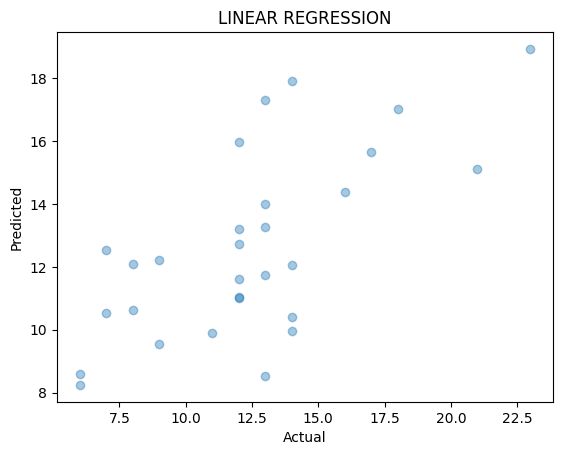

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['avg_bat_speed', 'blast_per_swing']]
y = data[['HR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LINEAR REGRESSION")
plt.show()

In [ ]:
reg.coef_

array([[ 0.87027796, 36.34436004]])

In [ ]:
reg.score(X_train, y_train) #train set R^2 점수

0.3201942748036958

In [ ]:
reg.score(X_test, y_test) #test set R^2 점수

0.45405334222150995

##4개 입력 피처들로 출력 피처 각각 예측해보기

In [ ]:
# 입력(feature)과 결과(target) 피쳐 분리
X = data[['avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y_H = data['H']
y_HR = data['HR']
y_AVG = data['AVG']
y_SLG = data['SLG']
y_OPS = data['OPS']

from sklearn.model_selection import train_test_split

# 각 결과 피쳐에 대해 Train/Test 분할
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X, y_H, test_size=0.2, random_state=42)
X_train_HR, X_test_HR, y_train_HR, y_test_HR = train_test_split(X, y_HR, test_size=0.2, random_state=42)
X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG = train_test_split(X, y_AVG, test_size=0.2, random_state=42)
X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG = train_test_split(X, y_SLG, test_size=0.2, random_state=42)
X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS = train_test_split(X, y_OPS, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# 각 결과 피쳐에 대해 모델 생성
model_H = LinearRegression()
model_HR = LinearRegression()
model_AVG = LinearRegression()
model_SLG = LinearRegression()
model_OPS = LinearRegression()

# 모델 학습
model_H.fit(X_train_H, y_train_H)
model_HR.fit(X_train_HR, y_train_HR)
model_AVG.fit(X_train_AVG, y_train_AVG)
model_SLG.fit(X_train_SLG, y_train_SLG)
model_OPS.fit(X_train_OPS, y_train_OPS)

from sklearn.metrics import mean_squared_error, r2_score

# 예측 및 평가 (H)
y_pred_H = model_H.predict(X_test_H)
mse_H = mean_squared_error(y_test_H, y_pred_H)
r2_H = r2_score(y_test_H, y_pred_H)
print(f'H - MSE: {mse_H}, R^2: {r2_H}')

# 예측 및 평가 (HR)
y_pred_HR = model_HR.predict(X_test_HR)
mse_HR = mean_squared_error(y_test_HR, y_pred_HR)
r2_HR = r2_score(y_test_HR, y_pred_HR)
print(f'HR - MSE: {mse_HR}, R^2: {r2_HR}')

# 예측 및 평가 (AVG)
y_pred_AVG = model_AVG.predict(X_test_AVG)
mse_AVG = mean_squared_error(y_test_AVG, y_pred_AVG)
r2_AVG = r2_score(y_test_AVG, y_pred_AVG)
print(f'AVG - MSE: {mse_AVG}, R^2: {r2_AVG}')

# 예측 및 평가 (SLG)
y_pred_SLG = model_SLG.predict(X_test_SLG)
mse_SLG = mean_squared_error(y_test_SLG, y_pred_SLG)
r2_SLG = r2_score(y_test_SLG, y_pred_SLG)
print(f'SLG - MSE: {mse_SLG}, R^2: {r2_SLG}')

# 예측 및 평가 (OPS)
y_pred_OPS = model_OPS.predict(X_test_OPS)
mse_OPS = mean_squared_error(y_test_OPS, y_pred_OPS)
r2_OPS = r2_score(y_test_OPS, y_pred_OPS)
print(f'OPS - MSE: {mse_OPS}, R^2: {r2_OPS}')

H - MSE: 194.0289753231679, R^2: 0.05735001532711603
HR - MSE: 8.95462555763218, R^2: 0.4460988456922136
AVG - MSE: 0.0008149421212873043, R^2: 0.19015958444587744
SLG - MSE: 0.002264469041121438, R^2: 0.3793439752942158
OPS - MSE: 0.006272185675212527, R^2: 0.3452345711176097



H - Regression Report
MSE: 194.0289753231679
RMSE: 13.929428391831731
MAE: 11.382160582716939
R²: 0.05735001532711603

H - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.454570
3          swing_length    0.188702
0         avg_bat_speed    0.181155
1  squared_up_per_swing    0.175573


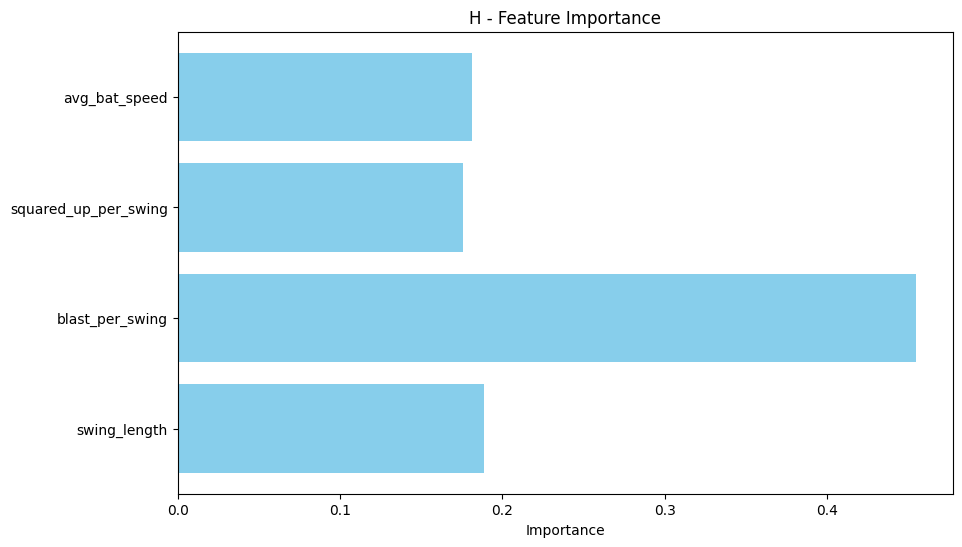


HR - Regression Report
MSE: 8.95462555763218
RMSE: 2.99242803716851
MAE: 2.5292746651048543
R²: 0.4460988456922136

HR - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.454570
3          swing_length    0.188702
0         avg_bat_speed    0.181155
1  squared_up_per_swing    0.175573


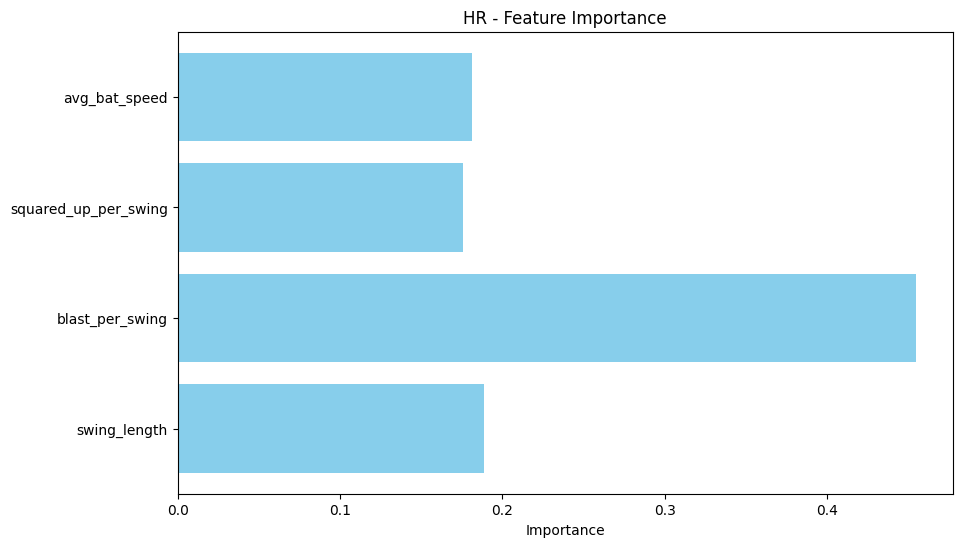


AVG - Regression Report
MSE: 0.0008149421212873043
RMSE: 0.028547191127802827
MAE: 0.023766590982095374
R²: 0.19015958444587744

AVG - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.454570
3          swing_length    0.188702
0         avg_bat_speed    0.181155
1  squared_up_per_swing    0.175573


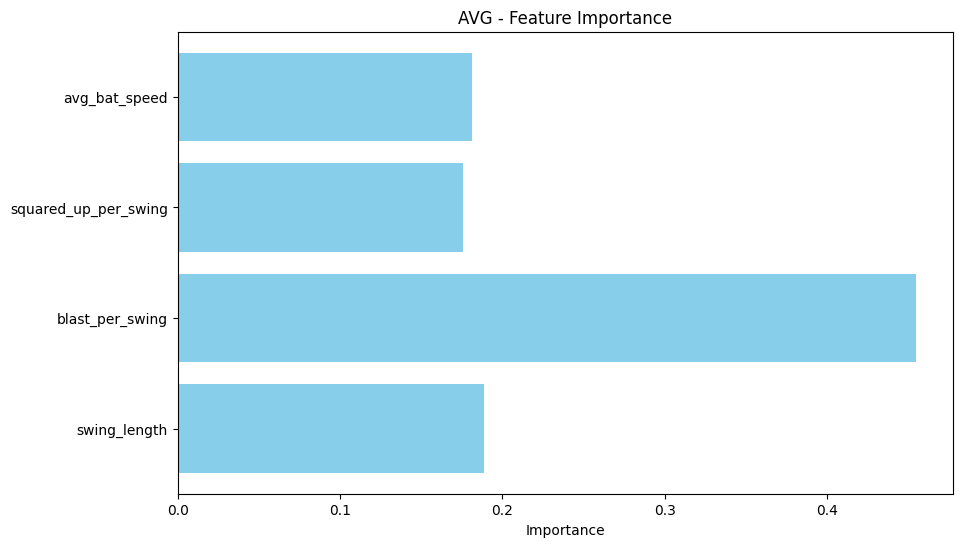


SLG - Regression Report
MSE: 0.002264469041121438
RMSE: 0.047586437575442
MAE: 0.036859526616508945
R²: 0.3793439752942158

SLG - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.454570
3          swing_length    0.188702
0         avg_bat_speed    0.181155
1  squared_up_per_swing    0.175573


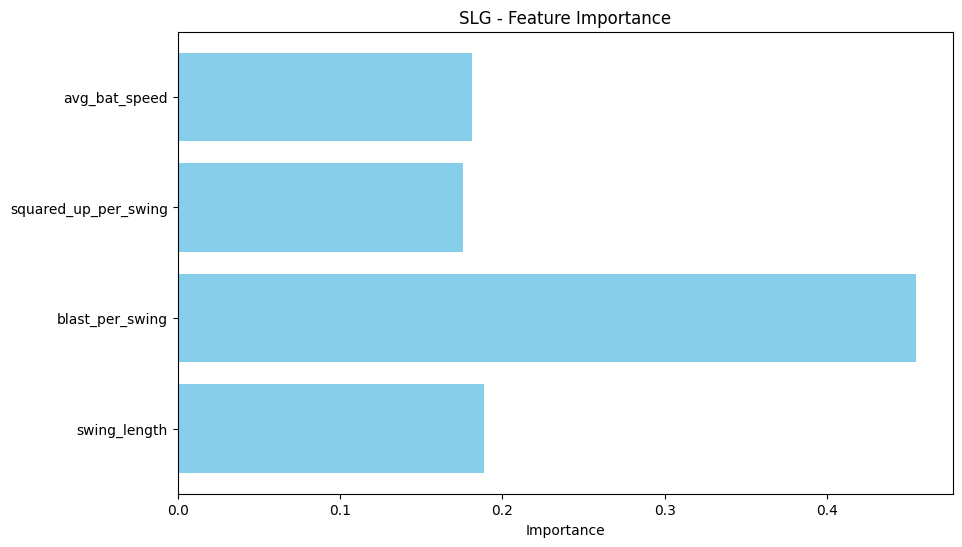


OPS - Regression Report
MSE: 0.006272185675212527
RMSE: 0.07919713173602012
MAE: 0.0626530804834136
R²: 0.3452345711176097

OPS - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.454570
3          swing_length    0.188702
0         avg_bat_speed    0.181155
1  squared_up_per_swing    0.175573


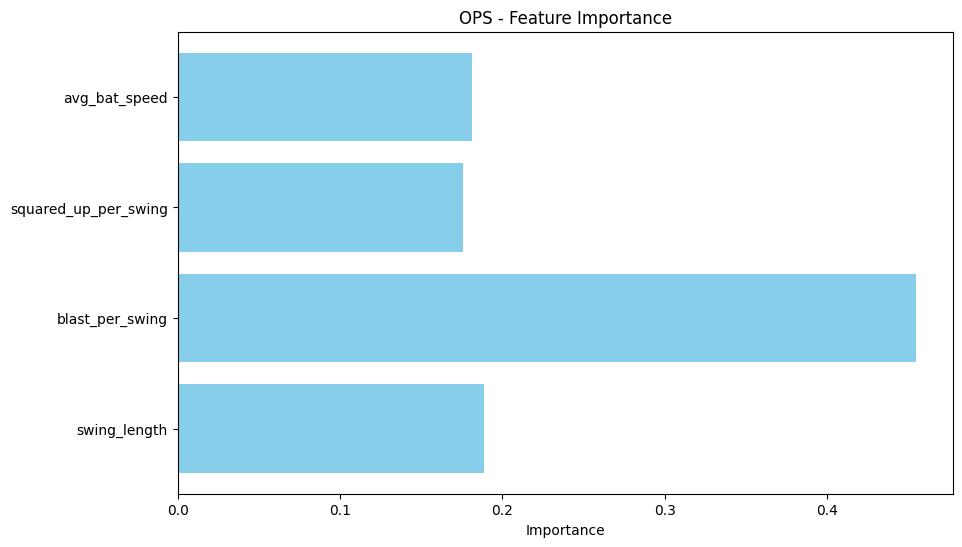

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 입력(feature)과 결과(target) 피쳐 분리
X = data[['avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y_H = data['H']
y_HR = data['HR']
y_AVG = data['AVG']
y_SLG = data['SLG']
y_OPS = data['OPS']

# Train/Test 분할
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X, y_H, test_size=0.2, random_state=42)
X_train_HR, X_test_HR, y_train_HR, y_test_HR = train_test_split(X, y_HR, test_size=0.2, random_state=42)
X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG = train_test_split(X, y_AVG, test_size=0.2, random_state=42)
X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG = train_test_split(X, y_SLG, test_size=0.2, random_state=42)
X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS = train_test_split(X, y_OPS, test_size=0.2, random_state=42)

# 다중 선형 회귀 모델 생성 및 학습
lr_model = LinearRegression()

# 각 결과 피쳐에 대해 모델 학습 및 평가
for (X_train, X_test, y_train, y_test, target_name) in [
    (X_train_H, X_test_H, y_train_H, y_test_H, "H"),
    (X_train_HR, X_test_HR, y_train_HR, y_test_HR, "HR"),
    (X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG, "AVG"),
    (X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG, "SLG"),
    (X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS, "OPS")
]:
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    # 회귀 모델 평가 지표 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\n{target_name} - Regression Report')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')

   # Feature Importance 출력
    importance = rf_model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    print(f"\n{target_name} - Feature Importance:")
    print(importance_df)

    # Feature Importance 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importance, color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'{target_name} - Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()

평균 배트 스피트 & 블래스트 vs 홈런 수

In [ ]:
# 입력(feature)과 결과(target) 피쳐 분리
X = data[['avg_bat_speed', 'blast_per_swing']]
y_HR = data['HR']

from sklearn.model_selection import train_test_split

# 피쳐에 대해 Train/Test 분할
X_train_HR, X_test_HR, y_train_HR, y_test_HR = train_test_split(X, y_HR, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

#결과 피쳐에 대해 모델 생성
model_HR = LinearRegression()

# 모델 학습
model_HR.fit(X_train_HR, y_train_HR)

from sklearn.metrics import mean_squared_error, r2_score

# 예측 및 평가 (HR)
y_pred_HR = model_HR.predict(X_test_HR)
mse_HR = mean_squared_error(y_test_HR, y_pred_HR)
r2_HR = r2_score(y_test_HR, y_pred_HR)
print(f'HR - MSE: {mse_HR}, R^2: {r2_HR}')

HR - MSE: 8.826029440138347, R^2: 0.45405334222150995


#XGBoost 사용

##4개 입력 피처들로 출력 피처 각각 예측해보기


H - Regression Report
MSE: 280.78730338697267
RMSE: 16.756709205180254
MAE: 14.568858442635372
R²: -0.3641475289617

H - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.505260
3          swing_length    0.186886
1  squared_up_per_swing    0.162509
0         avg_bat_speed    0.145344


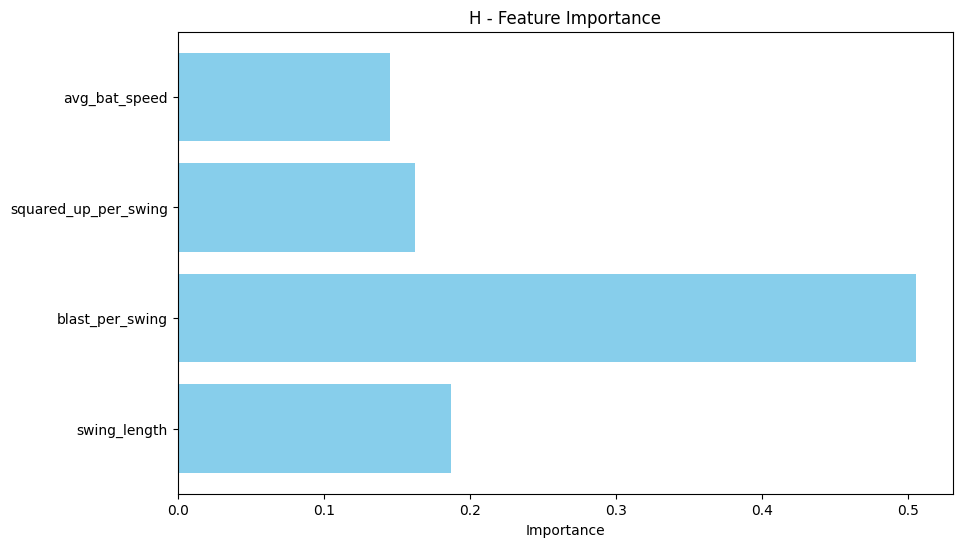


HR - Regression Report
MSE: 15.374033396429773
RMSE: 3.920973526616798
MAE: 3.242290792794063
R²: 0.04901720458977343

HR - Feature Importance:
                Feature  Importance
0         avg_bat_speed    0.399617
2       blast_per_swing    0.308798
3          swing_length    0.212550
1  squared_up_per_swing    0.079035


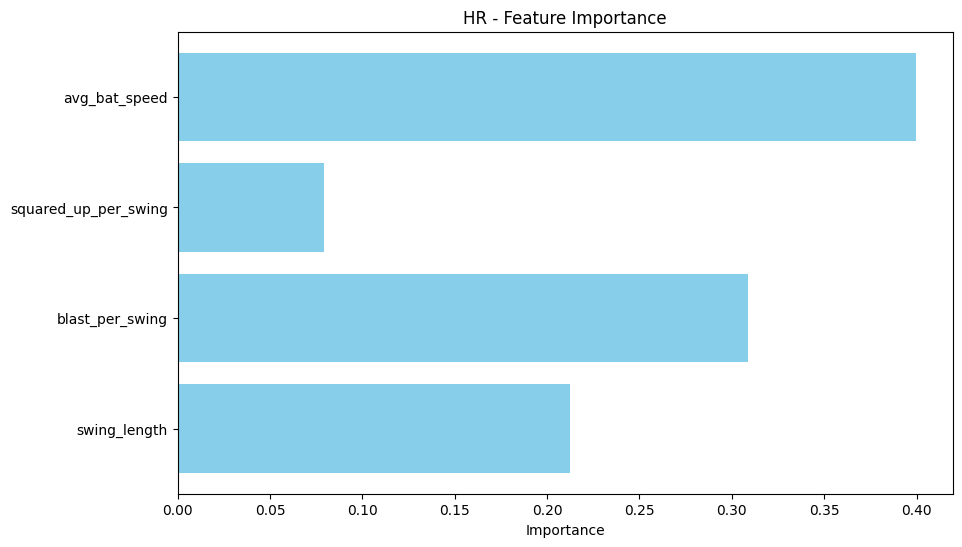


AVG - Regression Report
MSE: 0.0008048422178102135
RMSE: 0.028369741236222327
MAE: 0.02404120202311154
R²: 0.20019626044444216

AVG - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.419190
1  squared_up_per_swing    0.362816
3          swing_length    0.110764
0         avg_bat_speed    0.107230


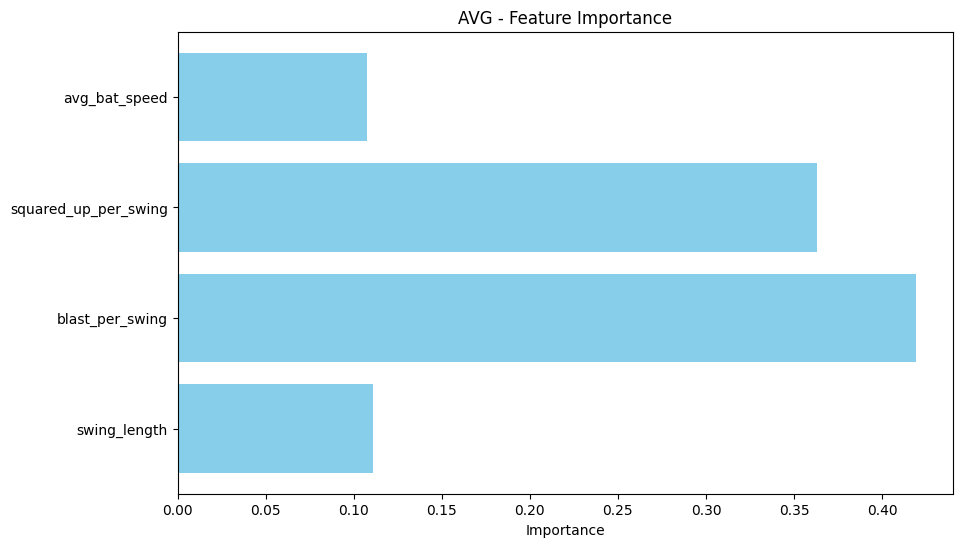


SLG - Regression Report
MSE: 0.002907123569167693
RMSE: 0.053917748183392206
MAE: 0.044007634795945265
R²: 0.20320228494952086

SLG - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.568571
1  squared_up_per_swing    0.161577
3          swing_length    0.147868
0         avg_bat_speed    0.121984


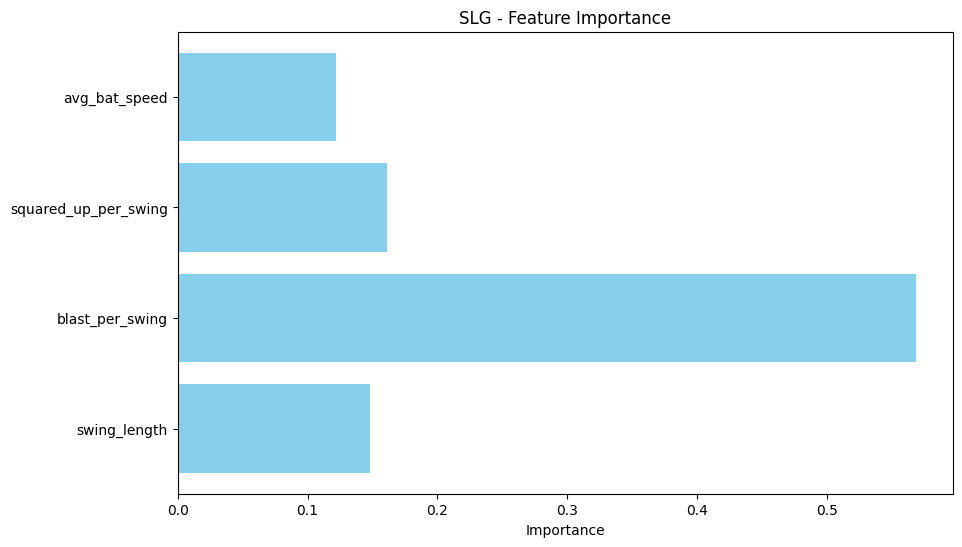


OPS - Regression Report
MSE: 0.006750897229061046
RMSE: 0.08216384380651288
MAE: 0.06538172608408434
R²: 0.29526095871239966

OPS - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.513369
1  squared_up_per_swing    0.213995
3          swing_length    0.138146
0         avg_bat_speed    0.134490


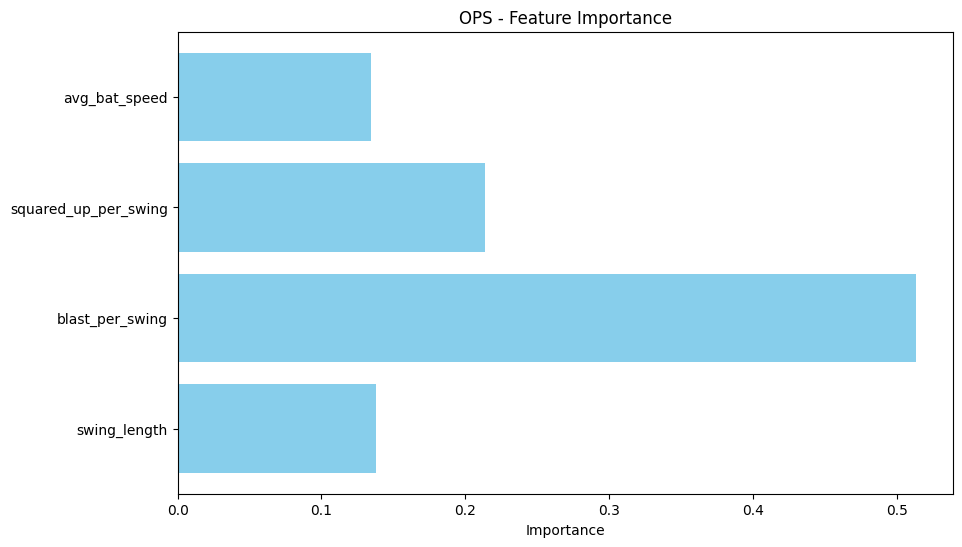

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# 입력(feature)과 결과(target) 피쳐 분리
X = data[['avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y_H = data['H']
y_HR = data['HR']
y_AVG = data['AVG']
y_SLG = data['SLG']
y_OPS = data['OPS']

# Train/Test 분할
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X, y_H, test_size=0.2, random_state=42)
X_train_HR, X_test_HR, y_train_HR, y_test_HR = train_test_split(X, y_HR, test_size=0.2, random_state=42)
X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG = train_test_split(X, y_AVG, test_size=0.2, random_state=42)
X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG = train_test_split(X, y_SLG, test_size=0.2, random_state=42)
X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS = train_test_split(X, y_OPS, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=100)

# 각 결과 피쳐에 대해 모델 학습 및 평가
for (X_train, X_test, y_train, y_test, target_name) in [
    (X_train_H, X_test_H, y_train_H, y_test_H, "H"),
    (X_train_HR, X_test_HR, y_train_HR, y_test_HR, "HR"),
    (X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG, "AVG"),
    (X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG, "SLG"),
    (X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS, "OPS")
]:
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    # 회귀 모델 평가 지표 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\n{target_name} - Regression Report')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')

    # Feature Importance 출력
    importance = xgb_model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    print(f"\n{target_name} - Feature Importance:")
    print(importance_df)

    # Feature Importance 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importance, color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'{target_name} - Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()


#랜덤 포레스트 사용

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 입력(feature)과 결과(target) 피쳐 분리
X = data[['avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y_H = data['H']
y_HR = data['HR']
y_AVG = data['AVG']
y_SLG = data['SLG']
y_OPS = data['OPS']

# Train/Test 분할
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X, y_H, test_size=0.2, random_state=42)
X_train_HR, X_test_HR, y_train_HR, y_test_HR = train_test_split(X, y_HR, test_size=0.2, random_state=42)
X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG = train_test_split(X, y_AVG, test_size=0.2, random_state=42)
X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG = train_test_split(X, y_SLG, test_size=0.2, random_state=42)
X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS = train_test_split(X, y_OPS, test_size=0.2, random_state=42)

# Random Forest 모델 생성 및 학습
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 각 결과 피쳐에 대해 모델 학습 및 평가
for (X_train, X_test, y_train, y_test, target_name) in [
    (X_train_H, X_test_H, y_train_H, y_test_H, "H"),
    (X_train_HR, X_test_HR, y_train_HR, y_test_HR, "HR"),
    (X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG, "AVG"),
    (X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG, "SLG"),
    (X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS, "OPS")
]:
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{target_name} - MSE: {mse}, R^2: {r2}')

H - MSE: 239.24281379310344, R^2: -0.16231214631497481
HR - MSE: 11.396520689655173, R^2: 0.29505193439246835
AVG - MSE: 0.0007577881827586185, R^2: 0.24695572753332984
SLG - MSE: 0.0024516473689655126, R^2: 0.32804128368698293
OPS - MSE: 0.006157967141379311, R^2: 0.35715806177369414



H - Regression Report
MSE: 239.24281379310344
RMSE: 15.467475999435184
MAE: 13.444827586206896
R²: -0.16231214631497481

H - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.463489
1  squared_up_per_swing    0.206376
3          swing_length    0.167042
0         avg_bat_speed    0.163092


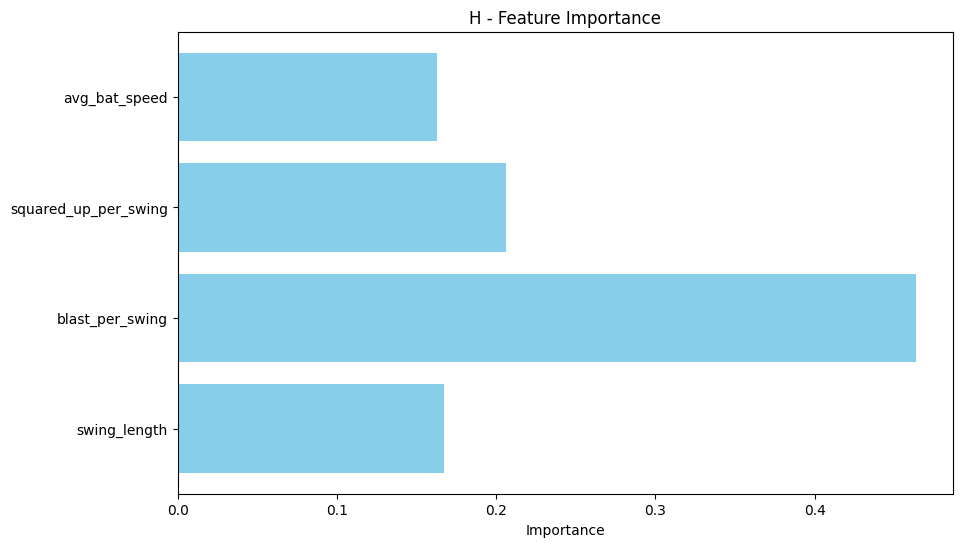


HR - Regression Report
MSE: 11.396520689655173
RMSE: 3.3758733225130313
MAE: 2.7279310344827583
R²: 0.29505193439246835

HR - Feature Importance:
                Feature  Importance
0         avg_bat_speed    0.415065
2       blast_per_swing    0.295812
3          swing_length    0.179305
1  squared_up_per_swing    0.109818


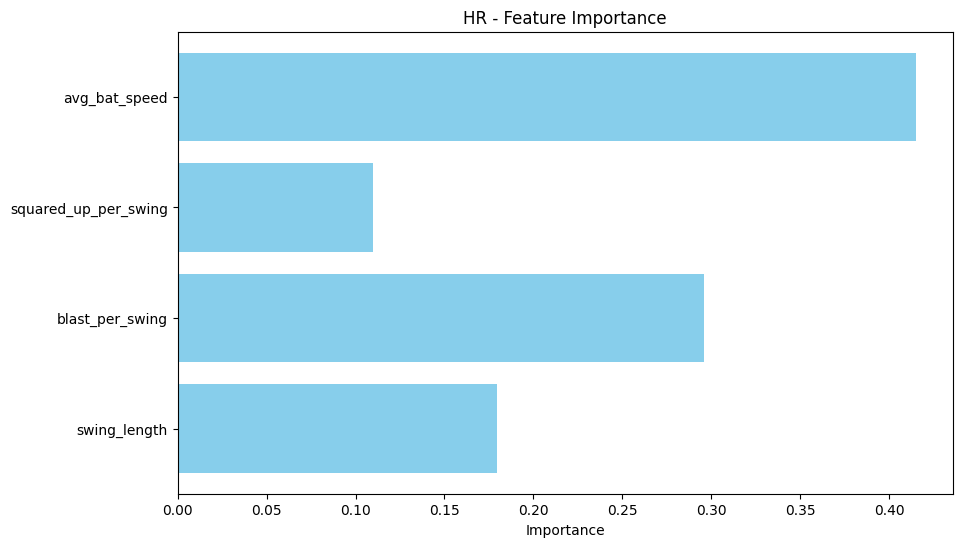


AVG - Regression Report
MSE: 0.0007577881827586185
RMSE: 0.02752795275276784
MAE: 0.022291379310344795
R²: 0.24695572753332984

AVG - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.390274
1  squared_up_per_swing    0.302732
0         avg_bat_speed    0.164104
3          swing_length    0.142890


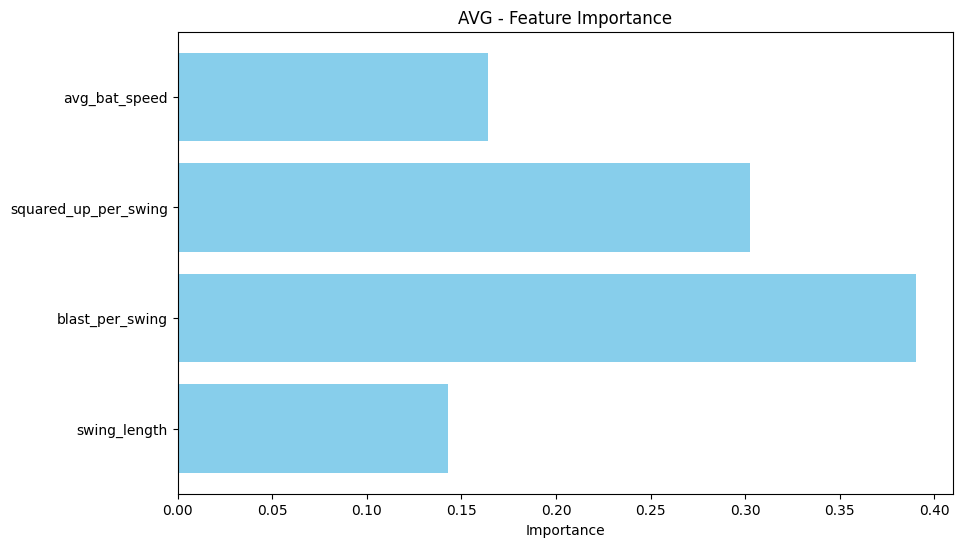


SLG - Regression Report
MSE: 0.0024516473689655126
RMSE: 0.04951411282619848
MAE: 0.03965068965517236
R²: 0.32804128368698293

SLG - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.425539
0         avg_bat_speed    0.230615
3          swing_length    0.198480
1  squared_up_per_swing    0.145366


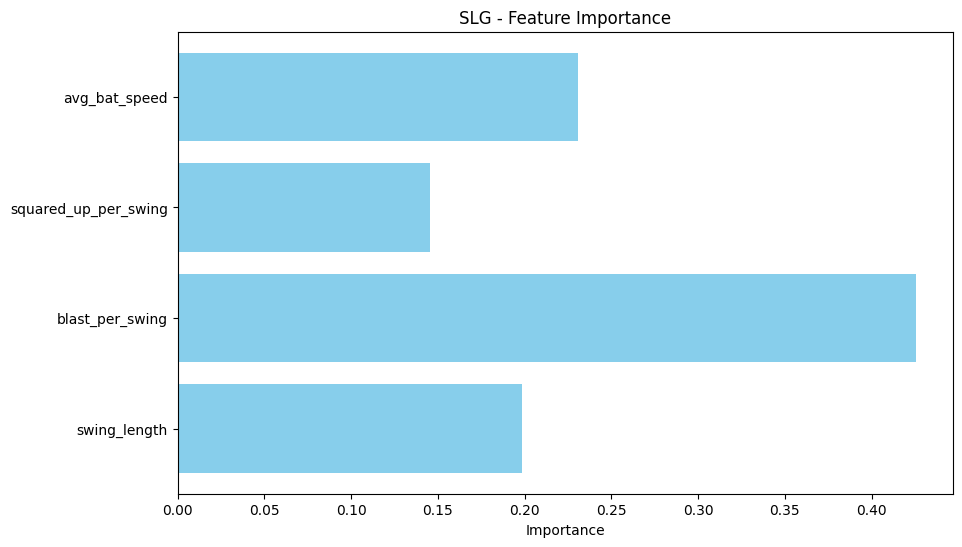


OPS - Regression Report
MSE: 0.006157967141379311
RMSE: 0.07847271590418743
MAE: 0.06275068965517237
R²: 0.35715806177369414

OPS - Feature Importance:
                Feature  Importance
2       blast_per_swing    0.454570
3          swing_length    0.188702
0         avg_bat_speed    0.181155
1  squared_up_per_swing    0.175573


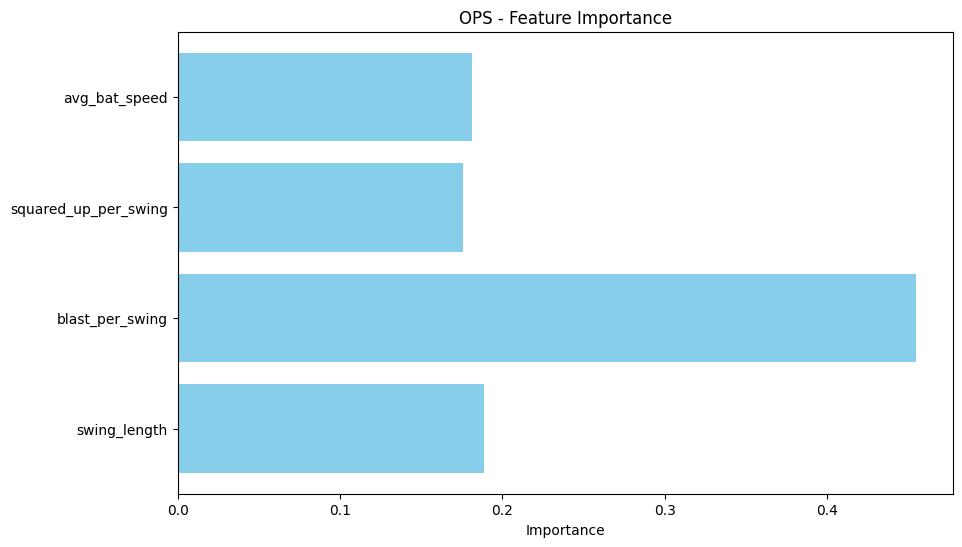

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# 입력(feature)과 결과(target) 피쳐 분리
X = data[['avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y_H = data['H']
y_HR = data['HR']
y_AVG = data['AVG']
y_SLG = data['SLG']
y_OPS = data['OPS']

# Train/Test 분할
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X, y_H, test_size=0.2, random_state=42)
X_train_HR, X_test_HR, y_train_HR, y_test_HR = train_test_split(X, y_HR, test_size=0.2, random_state=42)
X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG = train_test_split(X, y_AVG, test_size=0.2, random_state=42)
X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG = train_test_split(X, y_SLG, test_size=0.2, random_state=42)
X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS = train_test_split(X, y_OPS, test_size=0.2, random_state=42)

# Random Forest 모델 생성 및 학습
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 각 결과 피쳐에 대해 모델 학습 및 평가
for (X_train, X_test, y_train, y_test, target_name) in [
    (X_train_H, X_test_H, y_train_H, y_test_H, "H"),
    (X_train_HR, X_test_HR, y_train_HR, y_test_HR, "HR"),
    (X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG, "AVG"),
    (X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG, "SLG"),
    (X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS, "OPS")
]:
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # 회귀 모델 평가 지표 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\n{target_name} - Regression Report')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')

    # Feature Importance 출력
    importance = rf_model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    print(f"\n{target_name} - Feature Importance:")
    print(importance_df)

    # Feature Importance 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importance, color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'{target_name} - Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()


#결정 트리 사용

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 입력(feature)과 결과(target) 피쳐 분리
X = data[['avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y_H = data['H']
y_HR = data['HR']
y_AVG = data['AVG']
y_SLG = data['SLG']
y_OPS = data['OPS']

# Train/Test 분할
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X, y_H, test_size=0.2, random_state=42)
X_train_HR, X_test_HR, y_train_HR, y_test_HR = train_test_split(X, y_HR, test_size=0.2, random_state=42)
X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG = train_test_split(X, y_AVG, test_size=0.2, random_state=42)
X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG = train_test_split(X, y_SLG, test_size=0.2, random_state=42)
X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS = train_test_split(X, y_OPS, test_size=0.2, random_state=42)

# Decision Tree 모델 생성 및 학습
dt_model = DecisionTreeRegressor(random_state=42)

# 각 결과 피쳐에 대해 모델 학습 및 평가
for (X_train, X_test, y_train, y_test, target_name) in [
    (X_train_H, X_test_H, y_train_H, y_test_H, "H"),
    (X_train_HR, X_test_HR, y_train_HR, y_test_HR, "HR"),
    (X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG, "AVG"),
    (X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG, "SLG"),
    (X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS, "OPS")
]:
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{target_name} - MSE: {mse}, R^2: {r2}')


H - MSE: 338.58620689655174, R^2: -0.6449516481231157
HR - MSE: 16.655172413793103, R^2: -0.03022947925860553
AVG - MSE: 0.0012340000000000005, R^2: -0.22627490552973084
SLG - MSE: 0.00637496551724138, R^2: -0.7472796861943505
OPS - MSE: 0.012072862068965518, R^2: -0.26030910431494836


#SVM 사용

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# 입력(feature)과 결과(target) 피쳐 분리
X = data[['avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y_H = data['H']
y_HR = data['HR']
y_AVG = data['AVG']
y_SLG = data['SLG']
y_OPS = data['OPS']

# Train/Test 분할
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X, y_H, test_size=0.2, random_state=42)
X_train_HR, X_test_HR, y_train_HR, y_test_HR = train_test_split(X, y_HR, test_size=0.2, random_state=42)
X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG = train_test_split(X, y_AVG, test_size=0.2, random_state=42)
X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG = train_test_split(X, y_SLG, test_size=0.2, random_state=42)
X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS = train_test_split(X, y_OPS, test_size=0.2, random_state=42)

# SVM 모델 생성 및 학습
svm_model = SVR(kernel='rbf')

# 각 결과 피쳐에 대해 모델 학습 및 평가
for (X_train, X_test, y_train, y_test, target_name) in [
    (X_train_H, X_test_H, y_train_H, y_test_H, "H"),
    (X_train_HR, X_test_HR, y_train_HR, y_test_HR, "HR"),
    (X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG, "AVG"),
    (X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG, "SLG"),
    (X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS, "OPS")
]:
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{target_name} - MSE: {mse}, R^2: {r2}')


H - MSE: 212.28009685974908, R^2: -0.03131931567391666
HR - MSE: 16.857374465818157, R^2: -0.04273697600419757
AVG - MSE: 0.0010719655172413793, R^2: -0.06525479204724571
SLG - MSE: 0.0033295489409275307, R^2: 0.087422008332675
OPS - MSE: 0.008456249231431328, R^2: 0.11723600966788894


In [ ]:
# SVM 모델 생성 및 학습
svm_model = SVR(kernel='poly')

# 각 결과 피쳐에 대해 모델 학습 및 평가
for (X_train, X_test, y_train, y_test, target_name) in [
    (X_train_H, X_test_H, y_train_H, y_test_H, "H"),
    (X_train_HR, X_test_HR, y_train_HR, y_test_HR, "HR"),
    (X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG, "AVG"),
    (X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG, "SLG"),
    (X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS, "OPS")
]:
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{target_name} - MSE: {mse}, R^2: {r2}')

H - MSE: 211.73959074795897, R^2: -0.02869337757809398
HR - MSE: 13.37732365702392, R^2: 0.17252653754360714
AVG - MSE: 0.0010719655172413793, R^2: -0.06525479204724571
SLG - MSE: 0.003451954912696534, R^2: 0.05387242012511251
OPS - MSE: 0.008310694762976797, R^2: 0.13243071832264353


In [ ]:
# SVM 모델 생성 및 학습
svm_model = SVR(kernel='linear')  # 'rbf'는 비선형 커널을 사용

# 각 결과 피쳐에 대해 모델 학습 및 평가
for (X_train, X_test, y_train, y_test, target_name) in [
    (X_train_H, X_test_H, y_train_H, y_test_H, "H"),
    (X_train_HR, X_test_HR, y_train_HR, y_test_HR, "HR"),
    (X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG, "AVG"),
    (X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG, "SLG"),
    (X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS, "OPS")
]:
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{target_name} - MSE: {mse}, R^2: {r2}')

H - MSE: 208.66817302355, R^2: -0.013771524457878881
HR - MSE: 9.540254275717306, R^2: 0.4098739448456712
AVG - MSE: 0.0010719655172413793, R^2: -0.06525479204724571
SLG - MSE: 0.003565807563669864, R^2: 0.022667165174783288
OPS - MSE: 0.00799386021660779, R^2: 0.165505681083696


In [ ]:
# SVM 모델 생성 및 학습
svm_model = SVR(kernel='sigmoid')  # 'rbf'는 비선형 커널을 사용

# 각 결과 피쳐에 대해 모델 학습 및 평가
for (X_train, X_test, y_train, y_test, target_name) in [
    (X_train_H, X_test_H, y_train_H, y_test_H, "H"),
    (X_train_HR, X_test_HR, y_train_HR, y_test_HR, "HR"),
    (X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG, "AVG"),
    (X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG, "SLG"),
    (X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS, "OPS")
]:
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{target_name} - MSE: {mse}, R^2: {r2}')

H - MSE: 212.35360170556308, R^2: -0.03167642389275116
HR - MSE: 17.873858732348026, R^2: -0.10561306221717359
AVG - MSE: 0.0010719655172413793, R^2: -0.06525479204724571
SLG - MSE: 0.004376714765071726, R^2: -0.1995899868939086
OPS - MSE: 0.010253580451576939, R^2: -0.07039082540064956


#LightGBM 사용

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 입력(feature)과 결과(target) 피쳐 분리
X = data[['avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y_H = data['H']
y_HR = data['HR']
y_AVG = data['AVG']
y_SLG = data['SLG']
y_OPS = data['OPS']

# Train/Test 분할
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X, y_H, test_size=0.2, random_state=42)
X_train_HR, X_test_HR, y_train_HR, y_test_HR = train_test_split(X, y_HR, test_size=0.2, random_state=42)
X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG = train_test_split(X, y_AVG, test_size=0.2, random_state=42)
X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG = train_test_split(X, y_SLG, test_size=0.2, random_state=42)
X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS = train_test_split(X, y_OPS, test_size=0.2, random_state=42)

# LightGBM 모델 생성 및 학습
lgbm_model = LGBMRegressor(random_state=42, n_estimators=100)

# 각 결과 피쳐에 대해 모델 학습 및 평가
for (X_train, X_test, y_train, y_test, target_name) in [
    (X_train_H, X_test_H, y_train_H, y_test_H, "H"),
    (X_train_HR, X_test_HR, y_train_HR, y_test_HR, "HR"),
    (X_train_AVG, X_test_AVG, y_train_AVG, y_test_AVG, "AVG"),
    (X_train_SLG, X_test_SLG, y_train_SLG, y_test_SLG, "SLG"),
    (X_train_OPS, X_test_OPS, y_train_OPS, y_test_OPS, "OPS")
]:
    lgbm_model.fit(X_train, y_train)
    y_pred = lgbm_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{target_name} - MSE: {mse}, R^2: {r2}')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 113, number of used features: 4
[LightGBM] [Info] Start training from score 83.955752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

#새로운 상호작용 팩터 생성을 통한 비선형 회귀 사용

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/sideproject/total_data.csv')

# 입력 피처 및 출력 타겟 설정
X = data[['avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y_H = data['H']
y_HR = data['HR']
y_AVG = data['AVG']
y_SLG = data['SLG']
y_OPS = data['OPS']

# 필요한 상호작용 항들을 수동으로 생성
X_interactions = pd.DataFrame({
    'f1': X['avg_bat_speed'],
    'f2': X['squared_up_per_swing'],
    'f3': X['blast_per_swing'],
    'f4': X['swing_length'],
    'f1*f2': X['avg_bat_speed'] * X['squared_up_per_swing'],
    'f1*f3': X['avg_bat_speed'] * X['blast_per_swing'],
    'f1*f4': X['avg_bat_speed'] * X['swing_length'],
    'f2*f3': X['squared_up_per_swing'] * X['blast_per_swing'],
    'f2*f4': X['squared_up_per_swing'] * X['swing_length'],
    'f3*f4': X['blast_per_swing'] * X['swing_length'],
    'f1*f2*f3': X['avg_bat_speed'] * X['squared_up_per_swing'] * X['blast_per_swing'],
    'f1*f2*f4': X['avg_bat_speed'] * X['squared_up_per_swing'] * X['swing_length'],
    'f2*f3*f4': X['squared_up_per_swing'] * X['blast_per_swing'] * X['swing_length'],
    'f1*f3*f4': X['avg_bat_speed'] * X['blast_per_swing'] * X['swing_length'],
    'f1*f2*f3*f4': X['avg_bat_speed'] * X['squared_up_per_swing'] * X['blast_per_swing'] * X['swing_length'],
})

# 회귀 모델 학습 및 결과 출력
outputs = {'H': y_H, 'HR': y_HR, 'AVG': y_AVG, 'SLG': y_SLG, 'OPS': y_OPS}
models = {}

for output_name, y in outputs.items():
    model = LinearRegression()
    model.fit(X_interactions, y)
    models[output_name] = model
    y_pred = model.predict(X_interactions)
    mse = mean_squared_error(y, y_pred)
    print(f'Model for {output_name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}\n')

# 회귀 방정식 출력
for output_name, model in models.items():
    print(f'Equation for {output_name}:')
    equation = f'{output_name} = {model.intercept_:.4f} + ' + ' + '.join(
        [f'{coef:.4f}*{name}' for coef, name in zip(model.coef_, X_interactions.columns)]
    )
    print(equation)
    print('\n')


Model for H:
Mean Squared Error: 162.33688814825175
Coefficients: [ 4.38243963e+00 -9.24591403e+02 -4.88447927e+04  2.20295010e+02
  3.81986383e+01  7.52723632e+02 -2.00091857e+00  2.09364835e+05
 -8.81736809e+01  5.93197785e+03 -3.15165703e+03 -2.12781880e+00
 -2.71619867e+04 -9.21777159e+01  4.10288605e+02]
Intercept: -824.523860190101

Model for HR:
Mean Squared Error: 17.729673761908526
Coefficients: [-3.26867572e+01 -1.24306330e+04 -4.70567344e+04 -3.95605383e+02
  1.63475299e+02  6.48431859e+02  5.26194947e+00  2.19804974e+05
  1.96093106e+03  6.89314114e+03 -3.01494074e+03 -2.60759067e+01
 -3.21398648e+04 -9.48012249e+01  4.40995175e+02]
Intercept: 2489.6958276815853

Model for AVG:
Mean Squared Error: 0.0006367955435504438
Coefficients: [-1.07342579e-01 -3.69376917e+01 -1.30945384e+02 -8.13440584e-01
  5.97837803e-01  2.07119400e+00  1.43290240e-02  6.08393194e+02
  5.40654723e+00  1.84485779e+01 -9.31733273e+00 -8.58786218e-02
 -8.83262583e+01 -2.88357653e-01  1.33905020e+00]


### 구한 다항식에 표본을 넣어서 정확도 알아보기

In [ ]:
import numpy as np
import pandas as pd
import random

# CSV 파일 로드
data = pd.read_csv('/content/drive/MyDrive/sideproject/total_data.csv')

# 랜덤으로 선수 선택
random_index = random.randint(0, len(data) - 1)
player_data = data.iloc[random_index]

# 선수 데이터 출력
print(f"Randomly Selected Player Index: {random_index}")
print("Player Data:")
print(player_data)

# 독립 변수 (입력 피처)
X_player = np.array([player_data['avg_bat_speed'], player_data['squared_up_per_swing'],
                     player_data['blast_per_swing'], player_data['swing_length']])

# 다항식 항 계산
f1, f2, f3, f4 = X_player
X_poly = np.array([
    f1,                   # f1
    f2,                   # f2
    f3,                   # f3
    f4,                   # f4
    f1*f2,                # f1*f2
    f1*f3,                # f1*f3
    f1*f4,                # f1*f4
    f2*f3,                # f2*f3
    f2*f4,                # f2*f4
    f3*f4,                # f3*f4
    f1*f2*f3,             # f1*f2*f3
    f1*f2*f4,             # f1*f2*f4
    f2*f3*f4,             # f2*f3*f4
    f1*f3*f4,             # f1*f3*f4
    f1*f2*f3*f4           # f1*f2*f3*f4
])

# 회귀 계수와 절편 (각 출력 변수에 대해)

# H 예측
coefficients_H = np.array([4.38243963e+00, -9.24591403e+02, -4.88447927e+04, 2.20295010e+02,
                           3.81986383e+01, 7.52723632e+02, -2.00091857e+00, 2.09364835e+05,
                           -8.81736809e+01, 5.93197785e+03, -3.15165703e+03, -2.12781880e+00,
                           -2.71619867e+04, -9.21777159e+01, 4.10288605e+02])
intercept_H = -824.523860190101

predicted_H = np.dot(X_poly, coefficients_H) + intercept_H
actual_H = player_data['H']
error_H = actual_H - predicted_H

# HR 예측
coefficients_HR = np.array([-3.26867572e+01, -1.24306330e+04, -4.70567344e+04, -3.95605383e+02,
                             1.63475299e+02,  6.48431859e+02,  5.26194947e+00,  2.19804974e+05,
                             1.96093106e+03,  6.89314114e+03, -3.01494074e+03, -2.60759067e+01,
                            -3.21398648e+04, -9.48012249e+01,  4.40995175e+02])
intercept_HR = 2489.6958276815853

predicted_HR = np.dot(X_poly, coefficients_HR) + intercept_HR
actual_HR = player_data['HR']
error_HR = actual_HR - predicted_HR

# AVG 예측
coefficients_AVG = np.array([-1.07342579e-01, -3.69376917e+01, -1.30945384e+02, -8.13440584e-01,
                             5.97837803e-01,  2.07119400e+00,  1.43290240e-02,  6.08393194e+02,
                             5.40654723e+00,  1.84485779e+01, -9.31733273e+00, -8.58786218e-02,
                             -8.83262583e+01, -2.88357653e-01,  1.33905020e+00])
intercept_AVG = 6.228147226177063

predicted_AVG = np.dot(X_poly, coefficients_AVG) + intercept_AVG
actual_AVG = player_data['AVG']
error_AVG = actual_AVG - predicted_AVG

# SLG 예측
coefficients_SLG = np.array([-5.45814653e-01, -1.91975422e+02, -6.70133200e+02, -5.51062491e+00,
                             2.77612801e+00,  9.76760497e+00,  8.09689628e-02,  3.06621167e+03,
                             2.87983237e+01,  9.58673234e+01, -4.41186922e+01, -4.15421905e-01,
                             -4.41623873e+02, -1.39038519e+00,  6.33705589e+00])
intercept_SLG = 37.297064792595

predicted_SLG = np.dot(X_poly, coefficients_SLG) + intercept_SLG
actual_SLG = player_data['SLG']
error_SLG = actual_SLG - predicted_SLG

# OPS 예측
coefficients_OPS = np.array([-9.57118027e-01, -3.22068223e+02, -1.06028311e+03, -9.95765576e+00,
                             4.58508440e+00,  1.52984705e+01,  1.43249581e-01,  4.85448114e+03,
                             4.88755971e+01,  1.53715838e+02, -6.91708357e+01, -6.94195952e-01,
                             -7.08115068e+02, -2.20689228e+00,  1.00623641e+01])
intercept_OPS = 66.85463987742729

predicted_OPS = np.dot(X_poly, coefficients_OPS) + intercept_OPS
actual_OPS = player_data['OPS']
error_OPS = actual_OPS - predicted_OPS

# 결과 출력
print(f"\nPredicted H: {predicted_H:.2f}, Actual H: {actual_H}, Error: {error_H:.2f}")
print(f"Predicted HR: {predicted_HR:.2f}, Actual HR: {actual_HR}, Error: {error_HR:.2f}")
print(f"Predicted AVG: {predicted_AVG:.3f}, Actual AVG: {actual_AVG}, Error: {error_AVG:.3f}")
print(f"Predicted SLG: {predicted_SLG:.3f}, Actual SLG: {actual_SLG}, Error: {error_SLG:.3f}")
print(f"Predicted OPS: {predicted_OPS:.3f}, Actual OPS: {actual_OPS}, Error: {error_OPS:.3f}")

Randomly Selected Player Index: 69
Player Data:
id                                        592206
name                           Castellanos, Nick
swings_competitive                           672
percent_swings_competitive               0.90566
contact                                      472
avg_bat_speed                          71.741751
hard_swing_rate                         0.224702
squared_up_per_bat_contact              0.330508
squared_up_per_swing                    0.232143
blast_per_bat_contact                   0.133475
blast_per_swing                          0.09375
swing_length                             7.59637
swords                                         9
batter_run_value                      -15.089306
whiffs                                       200
whiff_per_swing                         0.297619
batted_ball_events                           239
batted_ball_event_per_swing             0.355655
H                                             86
HR                   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/sideproject/total_data.csv')

# 입력 피처 및 출력 타겟 설정
X = data[['avg_bat_speed', 'squared_up_per_swing', 'blast_per_swing', 'swing_length']]
y_H = data['H']
y_HR = data['HR']
y_AVG = data['AVG']
y_SLG = data['SLG']
y_OPS = data['OPS']

# 데이터를 train/test로 분할
X_train, X_test, y_H_train, y_H_test, y_HR_train, y_HR_test, y_AVG_train, y_AVG_test, y_SLG_train, y_SLG_test, y_OPS_train, y_OPS_test = train_test_split(
    X, y_H, y_HR, y_AVG, y_SLG, y_OPS, test_size=0.2, random_state=42
)

# 필요한 상호작용 항들을 수동으로 생성 (train set)
X_train_interactions = pd.DataFrame({
    'f1': X_train['avg_bat_speed'],
    'f2': X_train['squared_up_per_swing'],
    'f3': X_train['blast_per_swing'],
    'f4': X_train['swing_length'],
    'f1*f2': X_train['avg_bat_speed'] * X_train['squared_up_per_swing'],
    'f1*f3': X_train['avg_bat_speed'] * X_train['blast_per_swing'],
    'f1*f4': X_train['avg_bat_speed'] * X_train['swing_length'],
    'f2*f3': X_train['squared_up_per_swing'] * X_train['blast_per_swing'],
    'f2*f4': X_train['squared_up_per_swing'] * X_train['swing_length'],
    'f3*f4': X_train['blast_per_swing'] * X_train['swing_length'],
    'f1*f2*f3': X_train['avg_bat_speed'] * X_train['squared_up_per_swing'] * X_train['blast_per_swing'],
    'f1*f2*f4': X_train['avg_bat_speed'] * X_train['squared_up_per_swing'] * X_train['swing_length'],
    'f2*f3*f4': X_train['squared_up_per_swing'] * X_train['blast_per_swing'] * X_train['swing_length'],
    'f1*f3*f4': X_train['avg_bat_speed'] * X_train['blast_per_swing'] * X_train['swing_length'],
    'f1*f2*f3*f4': X_train['avg_bat_speed'] * X_train['squared_up_per_swing'] * X_train['blast_per_swing'] * X_train['swing_length'],
})

# 테스트 세트에 대한 상호작용 항 생성
X_test_interactions = pd.DataFrame({
    'f1': X_test['avg_bat_speed'],
    'f2': X_test['squared_up_per_swing'],
    'f3': X_test['blast_per_swing'],
    'f4': X_test['swing_length'],
    'f1*f2': X_test['avg_bat_speed'] * X_test['squared_up_per_swing'],
    'f1*f3': X_test['avg_bat_speed'] * X_test['blast_per_swing'],
    'f1*f4': X_test['avg_bat_speed'] * X_test['swing_length'],
    'f2*f3': X_test['squared_up_per_swing'] * X_test['blast_per_swing'],
    'f2*f4': X_test['squared_up_per_swing'] * X_test['swing_length'],
    'f3*f4': X_test['blast_per_swing'] * X_test['swing_length'],
    'f1*f2*f3': X_test['avg_bat_speed'] * X_test['squared_up_per_swing'] * X_test['blast_per_swing'],
    'f1*f2*f4': X_test['avg_bat_speed'] * X_test['squared_up_per_swing'] * X_test['swing_length'],
    'f2*f3*f4': X_test['squared_up_per_swing'] * X_test['blast_per_swing'] * X_test['swing_length'],
    'f1*f3*f4': X_test['avg_bat_speed'] * X_test['blast_per_swing'] * X_test['swing_length'],
    'f1*f2*f3*f4': X_test['avg_bat_speed'] * X_test['squared_up_per_swing'] * X_test['blast_per_swing'] * X_test['swing_length'],
})

# 회귀 모델 학습 (train set)
outputs_train = {'H': y_H_train, 'HR': y_HR_train, 'AVG': y_AVG_train, 'SLG': y_SLG_train, 'OPS': y_OPS_train}
outputs_test = {'H': y_H_test, 'HR': y_HR_test, 'AVG': y_AVG_test, 'SLG': y_SLG_test, 'OPS': y_OPS_test}
models = {}

for output_name, y_train in outputs_train.items():
    model = LinearRegression()
    model.fit(X_train_interactions, y_train)
    models[output_name] = model

    # 모델 성능 및 계수 출력
    print(f"Model: {output_name}")
    y_pred = model.predict(X_test_interactions)
    mse = mean_squared_error(outputs_test[output_name], y_pred)
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    equation = " + ".join([f"{coef:.4f}*{feature}" for coef, feature in zip(model.coef_, X_train_interactions.columns)])
    print(f"Equation: y = {model.intercept_:.4f} + {equation}\n")
    print("-" * 50)

# 테스트 데이터셋에서 랜덤으로 5명 선수 선택
random_indices = random.sample(range(len(X_test)), 5)

# 선택된 선수들의 예측값 및 실제값 비교
for idx in random_indices:
    player_data = X_test.iloc[idx]
    actual_H = y_H_test.iloc[idx]
    actual_HR = y_HR_test.iloc[idx]
    actual_AVG = y_AVG_test.iloc[idx]
    actual_SLG = y_SLG_test.iloc[idx]
    actual_OPS = y_OPS_test.iloc[idx]

    # 선수의 비선형 항 계산
    f1, f2, f3, f4 = player_data['avg_bat_speed'], player_data['squared_up_per_swing'], player_data['blast_per_swing'], player_data['swing_length']
    X_poly = np.array([
        f1, f2, f3, f4, f1*f2, f1*f3, f1*f4, f2*f3, f2*f4, f3*f4,
        f1*f2*f3, f1*f2*f4, f2*f3*f4, f1*f3*f4, f1*f2*f3*f4
    ])

    # 예측값 계산
    predicted_H = np.dot(X_poly, models['H'].coef_) + models['H'].intercept_
    predicted_HR = np.dot(X_poly, models['HR'].coef_) + models['HR'].intercept_
    predicted_AVG = np.dot(X_poly, models['AVG'].coef_) + models['AVG'].intercept_
    predicted_SLG = np.dot(X_poly, models['SLG'].coef_) + models['SLG'].intercept_
    predicted_OPS = np.dot(X_poly, models['OPS'].coef_) + models['OPS'].intercept_

    # 선수의 데이터 출력
    print(f"Randomly Selected Player Index: {idx}")
    print("Player Data:")
    print(data.iloc[idx])  # 선수의 전체 데이터 출력

    # 결과 출력
    print(f"\nPredicted H: {predicted_H:.2f}, Actual H: {actual_H}, Error: {actual_H - predicted_H:.2f}")
    print(f"Predicted HR: {predicted_HR:.2f}, Actual HR: {actual_HR}, Error: {actual_HR - predicted_HR:.2f}")
    print(f"Predicted AVG: {predicted_AVG:.3f}, Actual AVG: {actual_AVG}, Error: {actual_AVG - predicted_AVG:.3f}")
    print(f"Predicted SLG: {predicted_SLG:.3f}, Actual SLG: {actual_SLG}, Error: {actual_SLG - predicted_SLG:.3f}")
    print(f"Predicted OPS: {predicted_OPS:.3f}, Actual OPS: {actual_OPS}, Error: {actual_OPS - predicted_OPS:.3f}")
    print("=" * 50)

Model: H
Mean Squared Error: 226.9404
Coefficients: [ 2.14078596e+01  5.16663461e+03 -5.04938096e+04  9.60013942e+01
 -1.07238337e+02  6.59611815e+02 -2.18155603e+00  1.96941849e+05
 -3.15398592e+02  7.61303691e+03 -2.48680709e+03  9.25957895e+00
 -3.11518714e+04 -9.97498369e+01  3.98925032e+02]
Intercept: -1038.4479484774558
Equation: y = -1038.4479 + 21.4079*f1 + 5166.6346*f2 + -50493.8096*f3 + 96.0014*f4 + -107.2383*f1*f2 + 659.6118*f1*f3 + -2.1816*f1*f4 + 196941.8486*f2*f3 + -315.3986*f2*f4 + 7613.0369*f3*f4 + -2486.8071*f1*f2*f3 + 9.2596*f1*f2*f4 + -31151.8714*f2*f3*f4 + -99.7498*f1*f3*f4 + 398.9250*f1*f2*f3*f4

--------------------------------------------------
Model: HR
Mean Squared Error: 14.4085
Coefficients: [-7.49203771e+01 -2.26889965e+04 -9.09269345e+04 -8.11718632e+02
  3.04976748e+02  1.27204268e+03  1.10760039e+01  3.86191782e+05
  3.39584277e+03  1.28746065e+04 -5.36469837e+03 -4.58551169e+01
 -5.49061153e+04 -1.79670713e+02  7.62064490e+02]
Intercept: 5506.89896097083